In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import os

In [2]:
import pywt

In [3]:
# Pitch Tracking
def pitch_tracking(audio_path):
    data, sample_rate = librosa.load(audio_path)
    # Estimate the pitch track
    pitches, magnitudes = librosa.piptrack(y = data, sr = sample_rate)
    
    return pitches


In [4]:
audio_files_dir = r'archive/16000_pcm_speeches'
dir_dict = {}

# Iterate through audio files in the directory
for class_name in os.listdir(audio_files_dir):
    if(class_name.endswith('.py') or class_name.endswith('.ipynb_checkpoints')):
        continue
        
    class_dir = os.path.join(audio_files_dir, class_name)
    
    if os.path.isdir(class_dir):
        audio_files_list = []
        
        for audio_file in os.listdir(class_dir):
            
            if audio_file.endswith('.wav'):
                audio_file_path = os.path.join(class_dir, audio_file)
                audio_files_list.append(audio_file_path)
        
        dir_dict[class_dir] = audio_files_list

In [5]:
def calculate_zero_crossing_rate(audio_path):
    data, sample_rate = librosa.load(audio_path)
    zcr = librosa.feature.zero_crossing_rate(data)
    return r'Zero Crossing Rate: ' + str(np.mean(zcr))
    # A low zero-crossing rate could indicate a more tonal signal, or a portion where the frequency is relatively stable.

archive/16000_pcm_speeches\Benjamin_Netanyau
Zero Crossing Rate: 0.06165660511363636


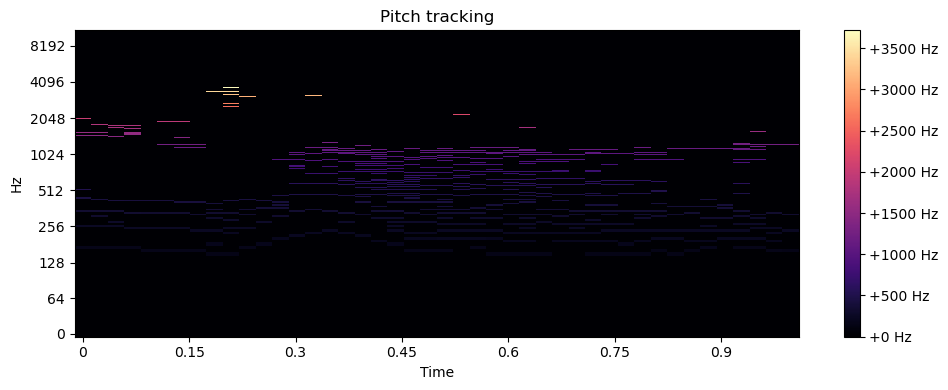

Zero Crossing Rate: 0.17003284801136365


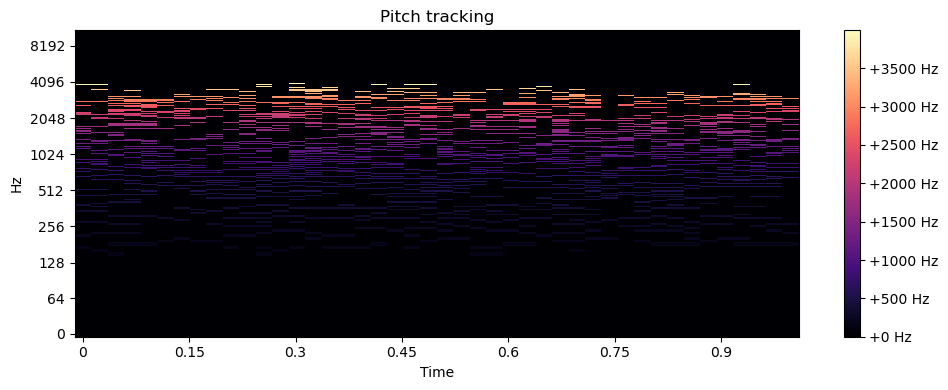

archive/16000_pcm_speeches\Jens_Stoltenberg
Zero Crossing Rate: 0.18970836292613635


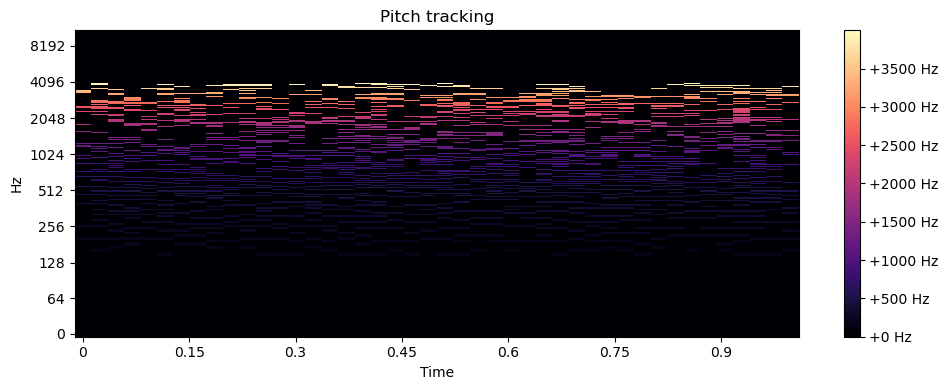

Zero Crossing Rate: 0.08101029829545454


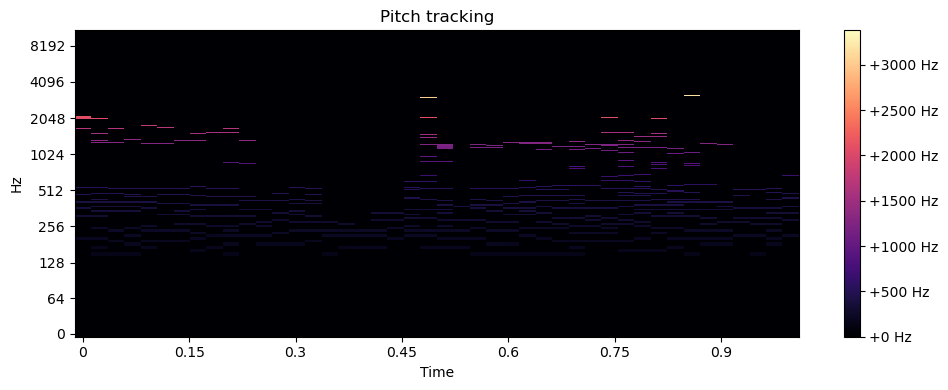

archive/16000_pcm_speeches\Julia_Gillard
Zero Crossing Rate: 0.14968039772727273


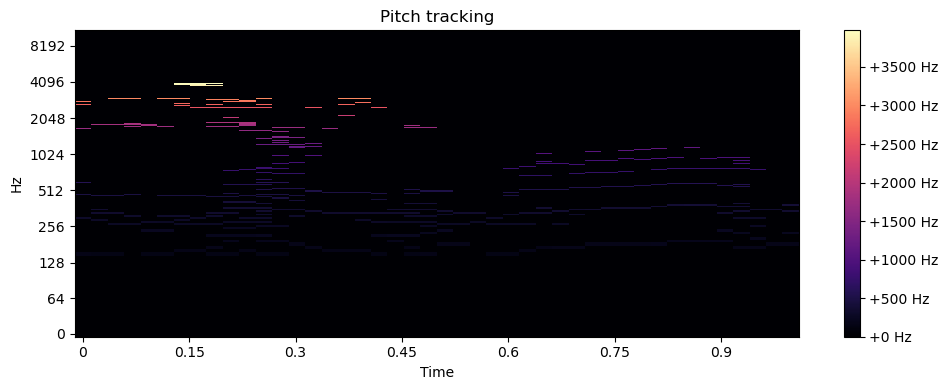

Zero Crossing Rate: 0.07206587357954546


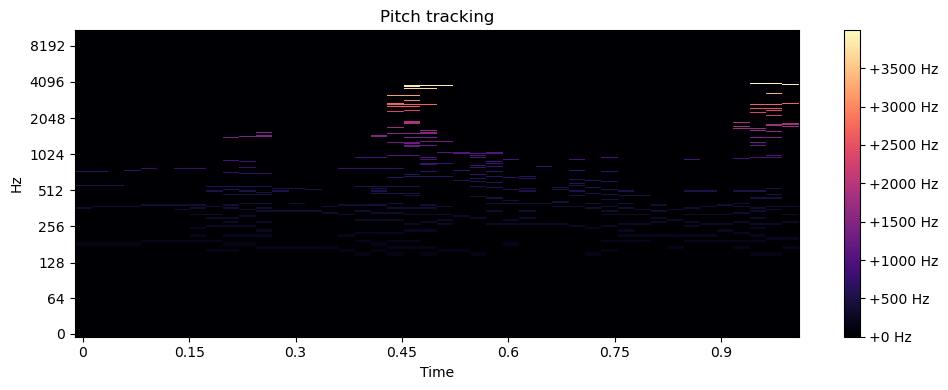

archive/16000_pcm_speeches\Magaret_Tarcher
Zero Crossing Rate: 0.05594149502840909


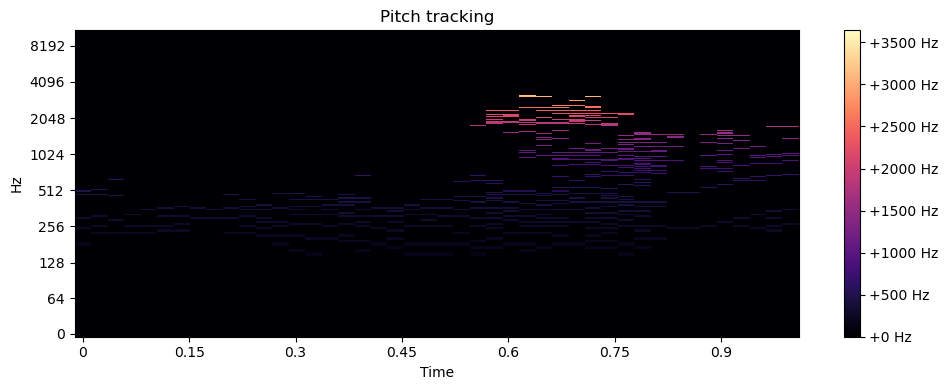

Zero Crossing Rate: 0.08371803977272728


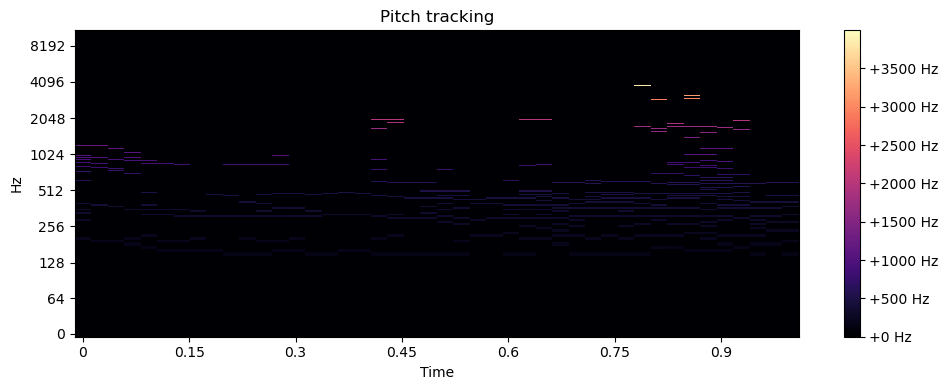

archive/16000_pcm_speeches\Nelson_Mandela
Zero Crossing Rate: 0.12420099431818182


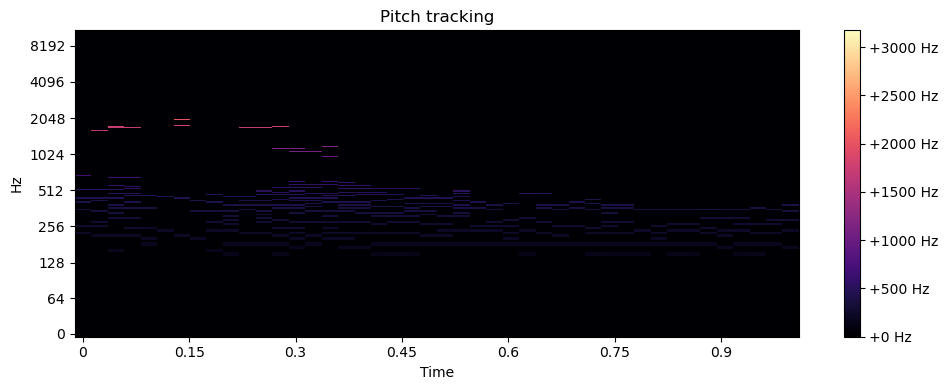

Zero Crossing Rate: 0.20805220170454544


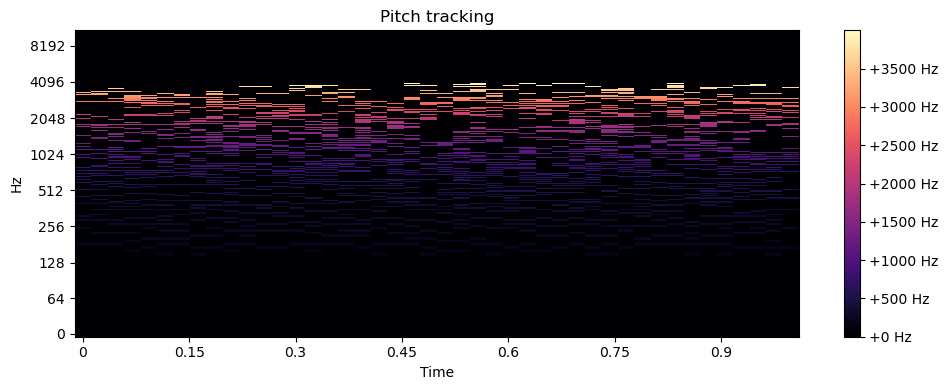

archive/16000_pcm_speeches\other
Zero Crossing Rate: 0.2795933975786581


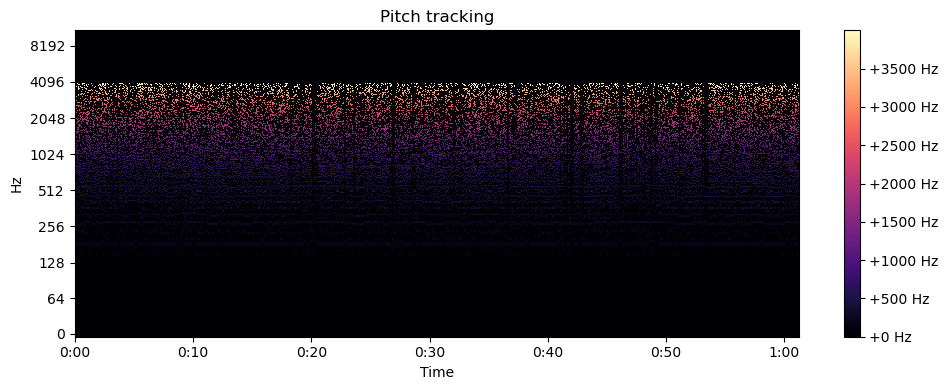

Zero Crossing Rate: 0.12261509378628097


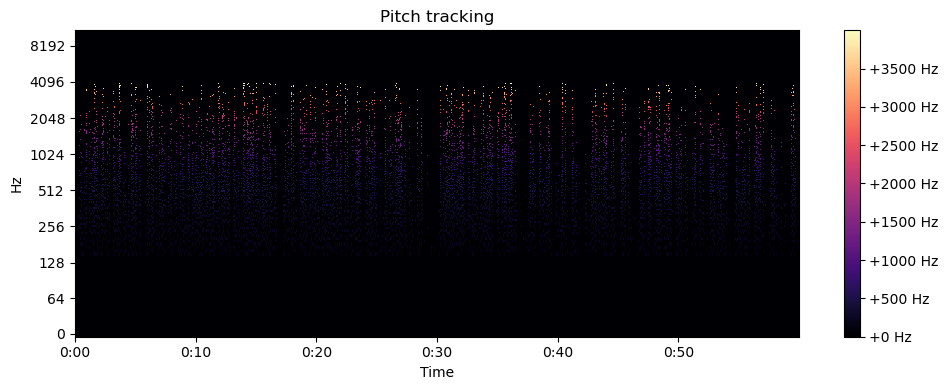

archive/16000_pcm_speeches\_background_noise_
Zero Crossing Rate: 0.1310842225609756


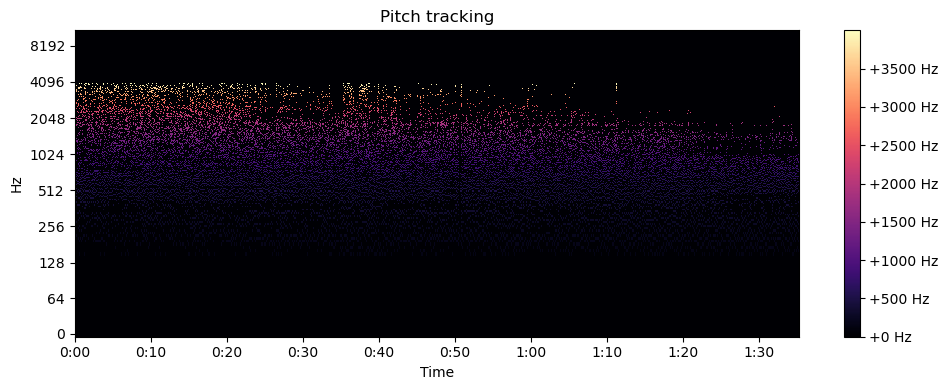

Zero Crossing Rate: 0.16513644052706553


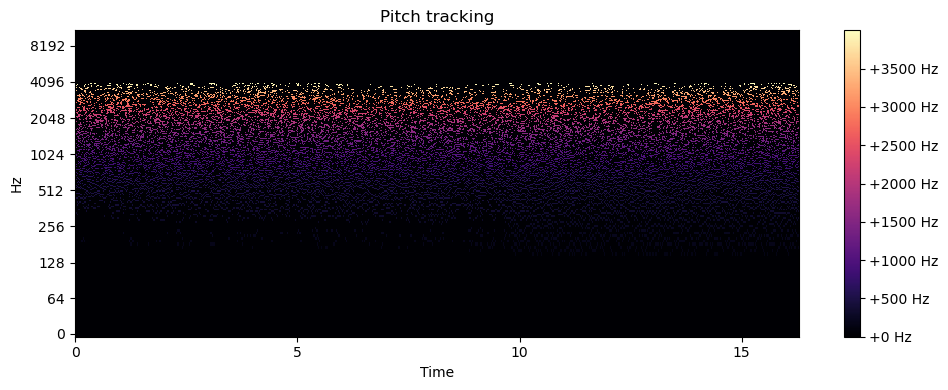

In [6]:
# Pitch Analysis
import random

for class_name in dir_dict:
    audio_paths = dir_dict[class_name]
    print(class_name)
    random_audio_paths = random.sample(audio_paths, 2)
    for audio_path in random_audio_paths:
        
        print(calculate_zero_crossing_rate(audio_path))
        pitches = pitch_tracking(audio_path)
        
        # Plotting the pitches
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(pitches, x_axis='time', y_axis='log')
        plt.colorbar(format='%+2.0f Hz')
        plt.title('Pitch tracking')
        plt.tight_layout()
        plt.show()

In [7]:
# Load the audio file
data, sample_rate = librosa.load(r'C:\Users\prava\OneDrive\Desktop\IIITD Coursework\Sem7\ML\ml_project\Guest-Speaker-Recognition\archive\16000_pcm_speeches\Benjamin_Netanyau\3.wav')
t = np.arange(len(data))/float(sample_rate)
len(t)

22050

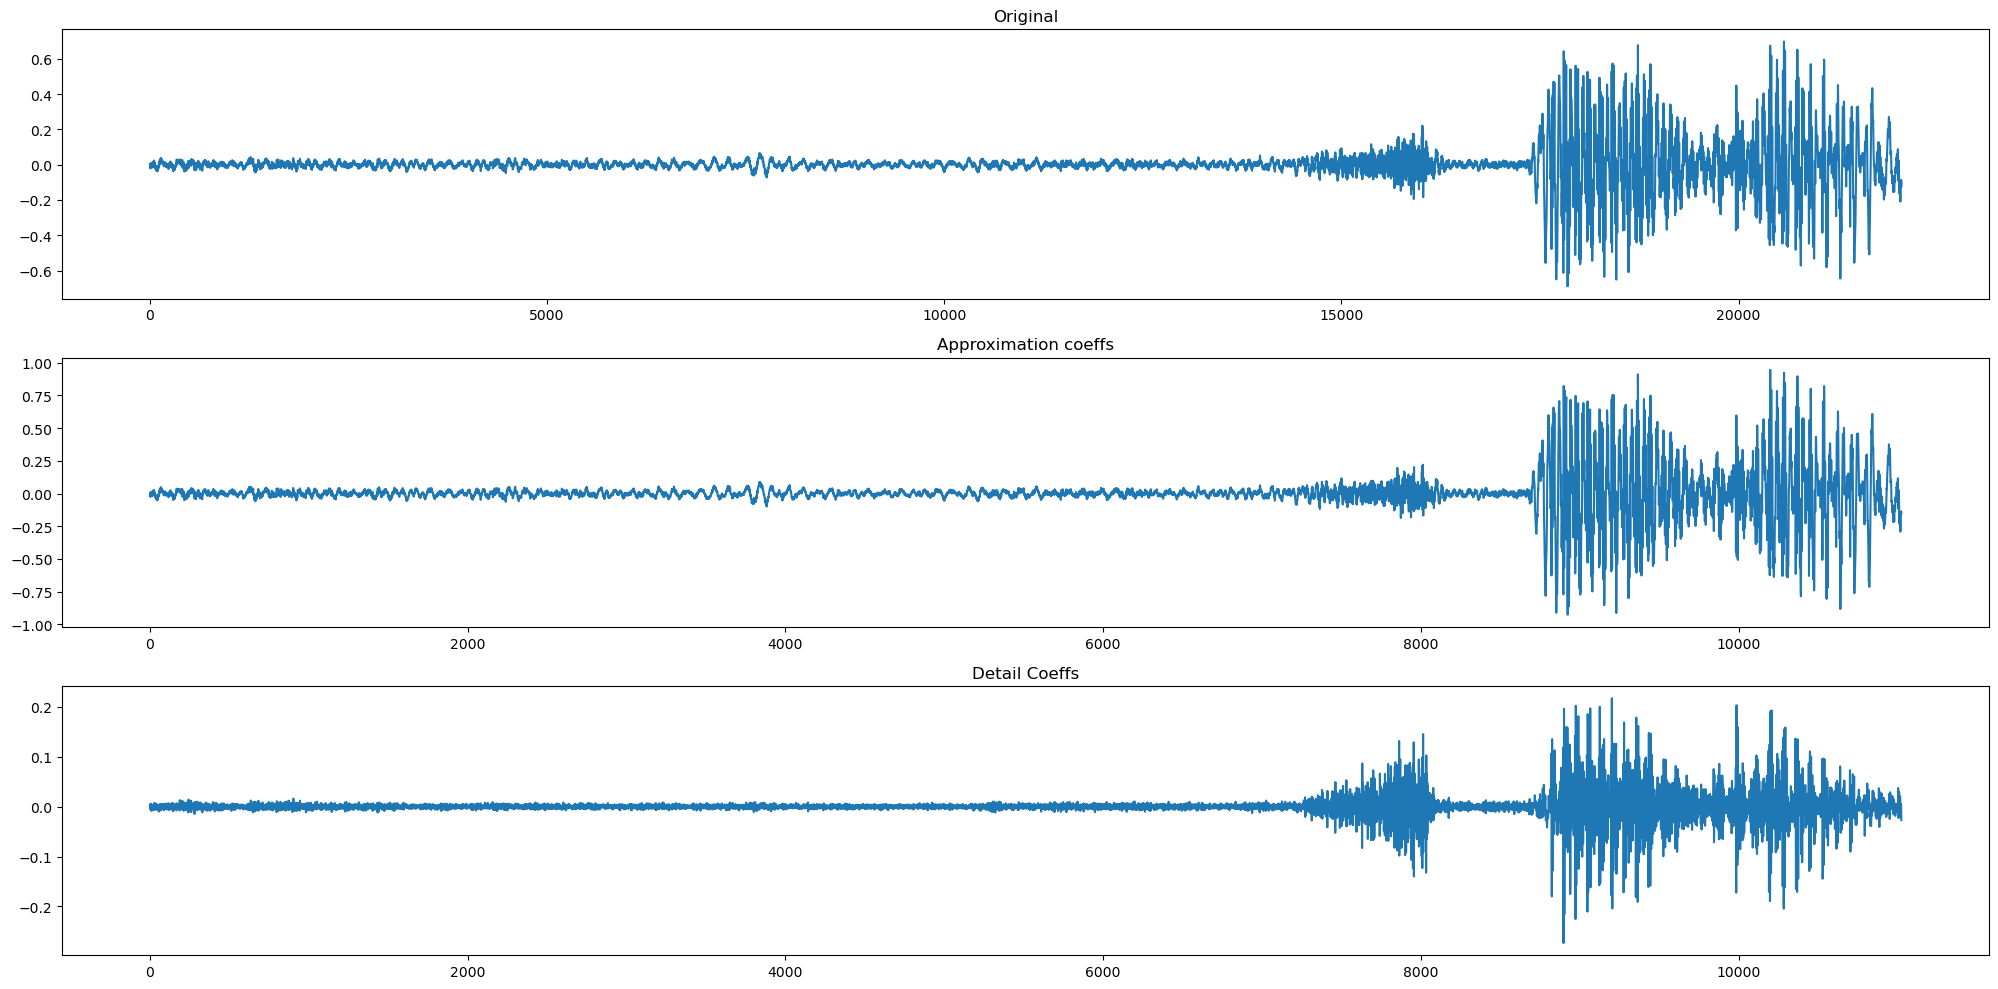

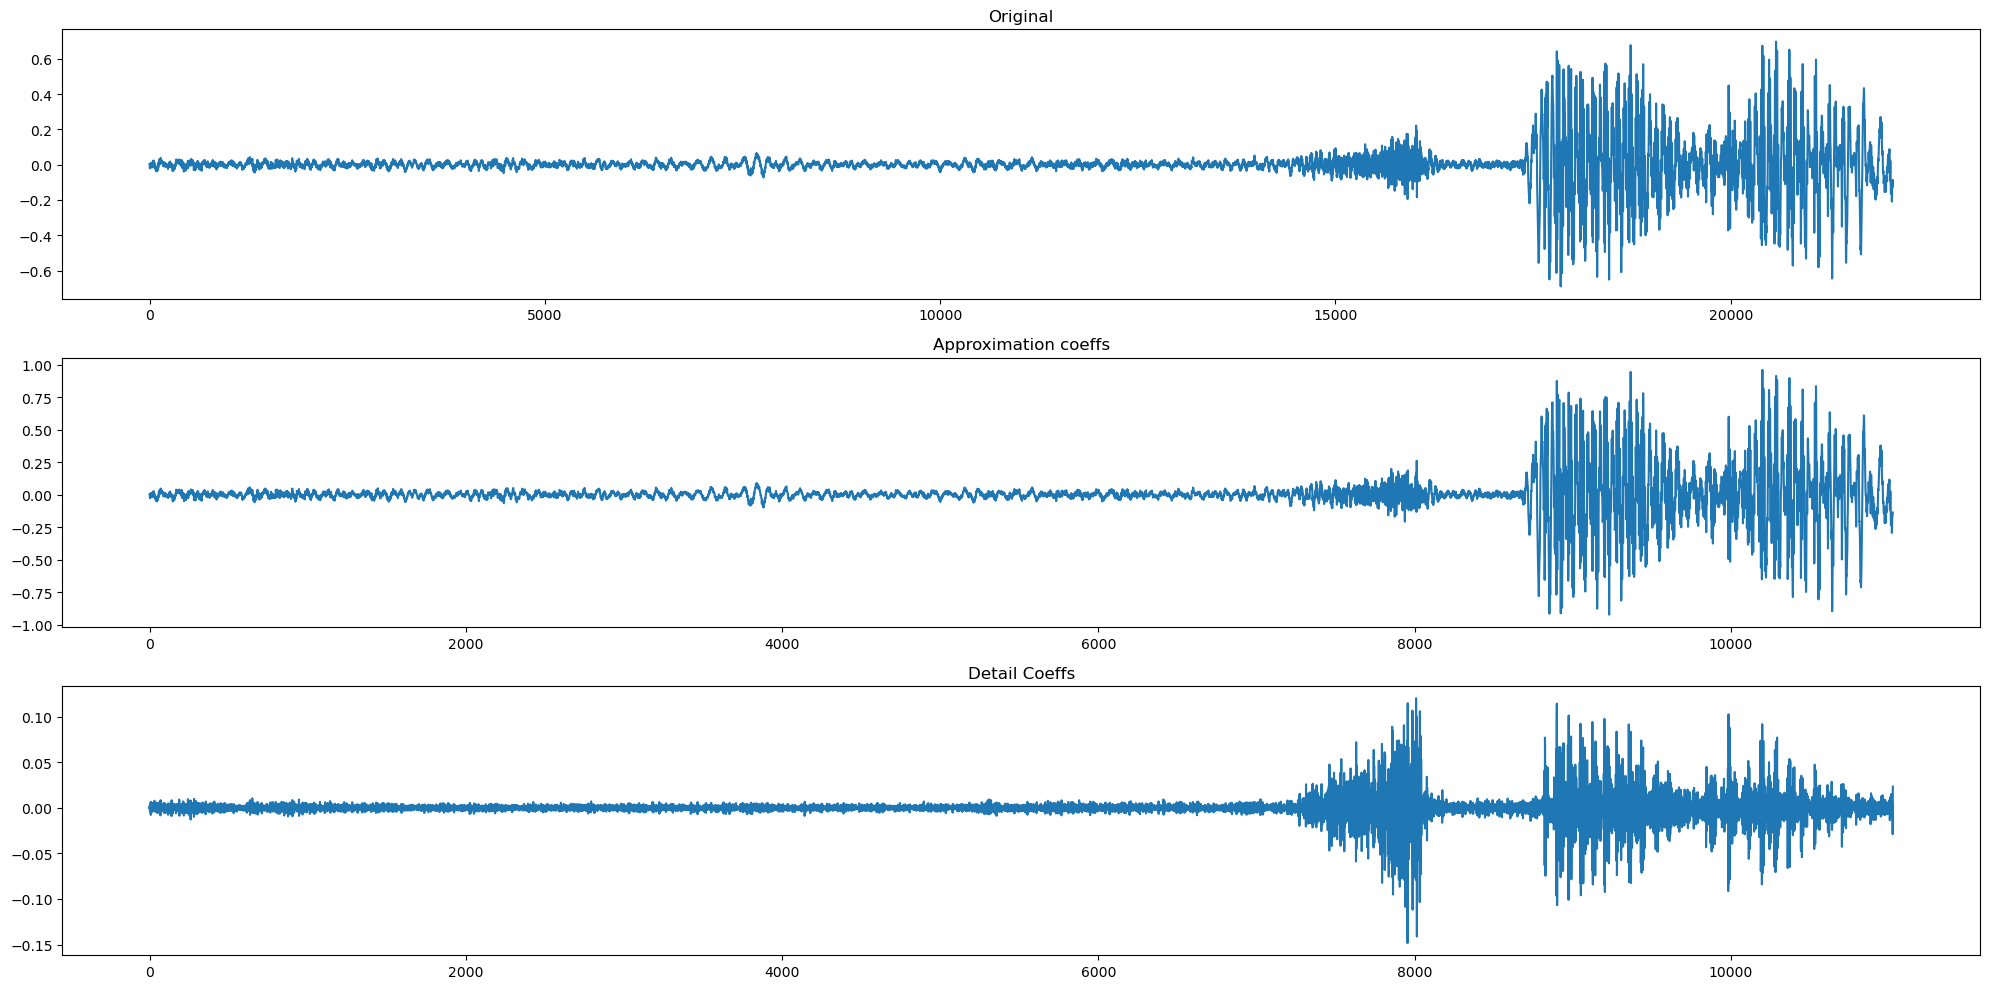

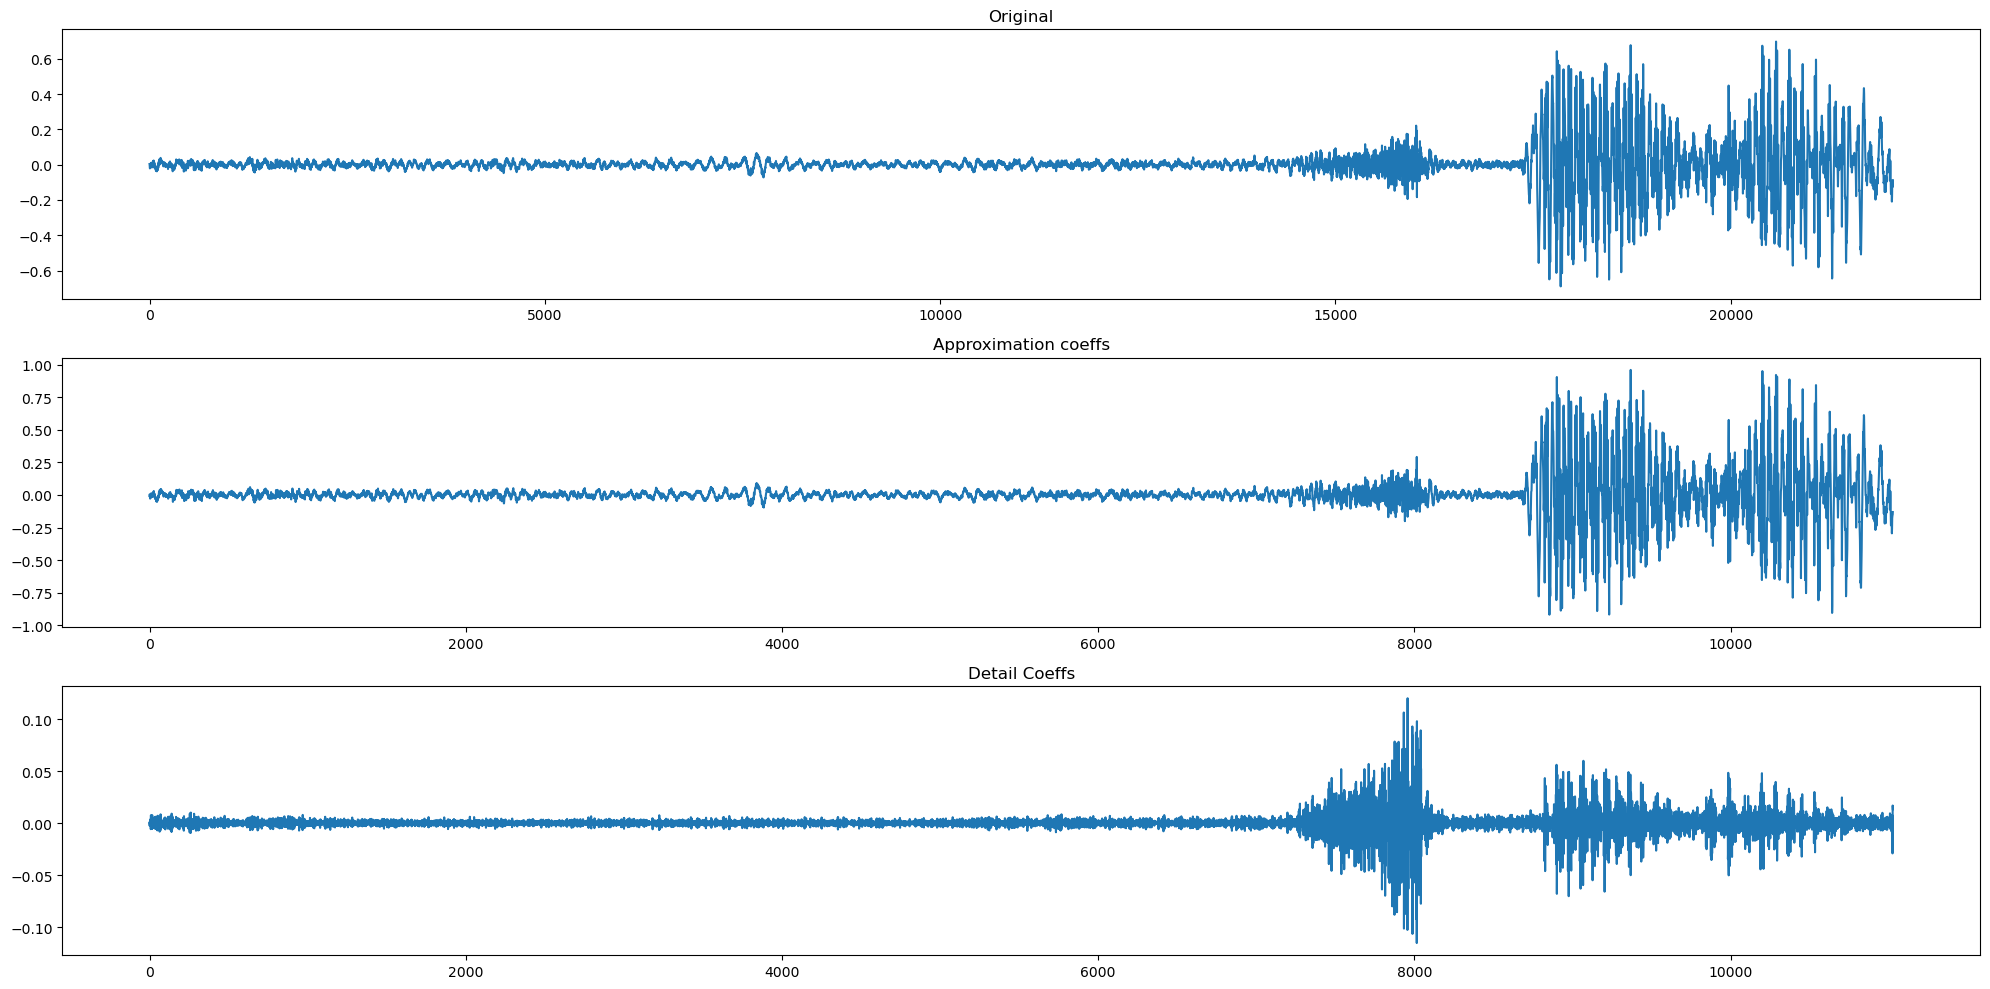

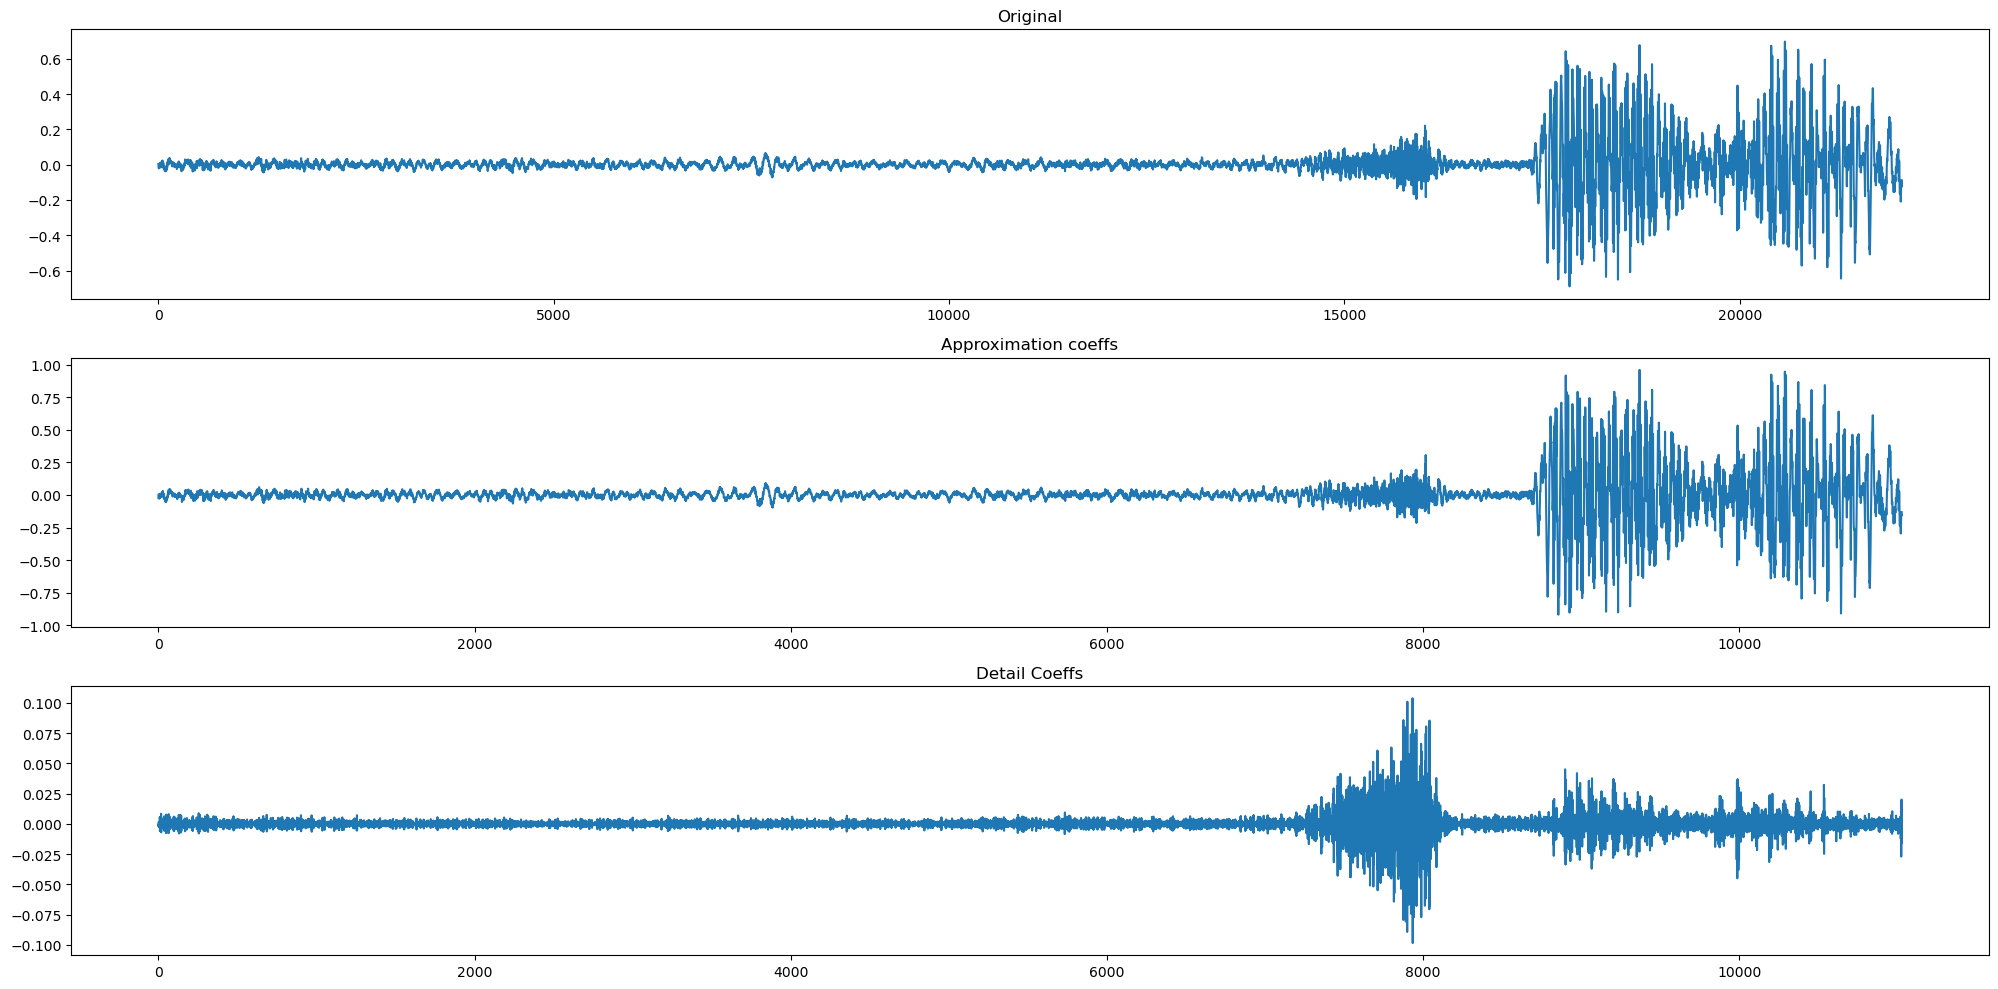

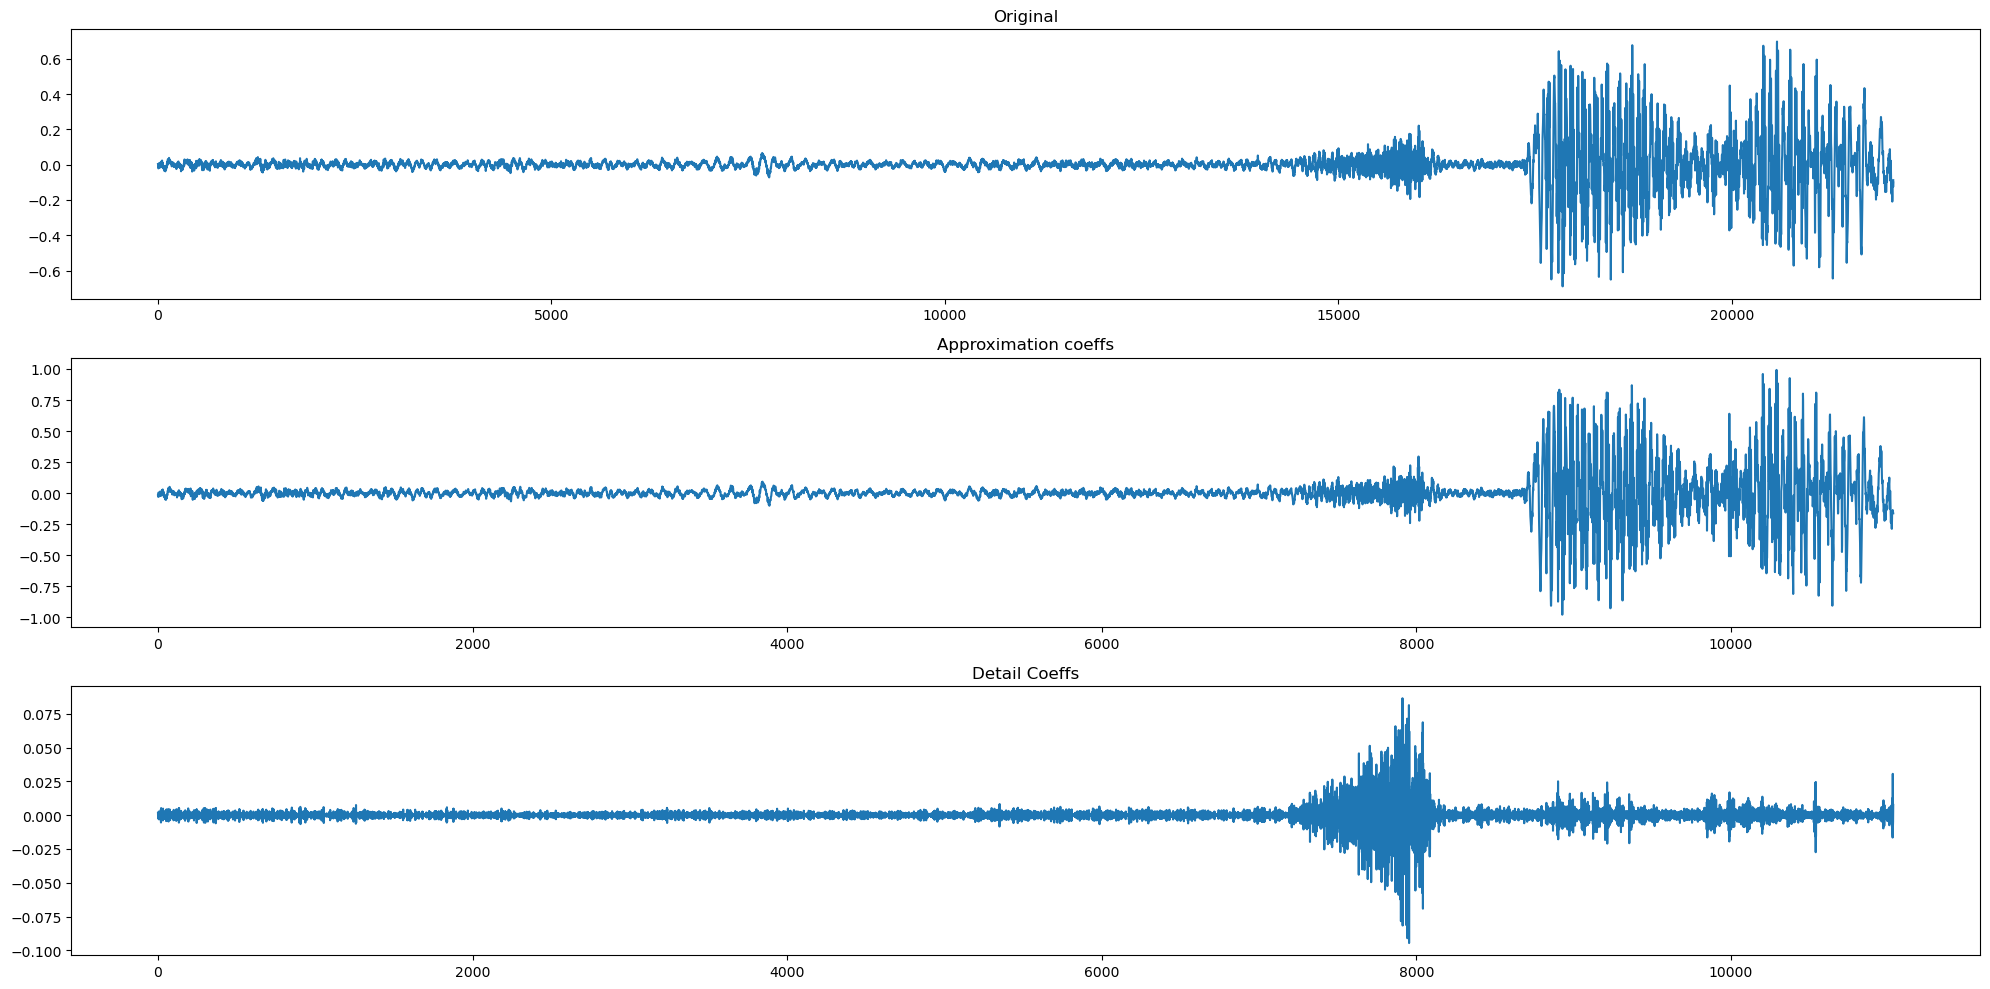

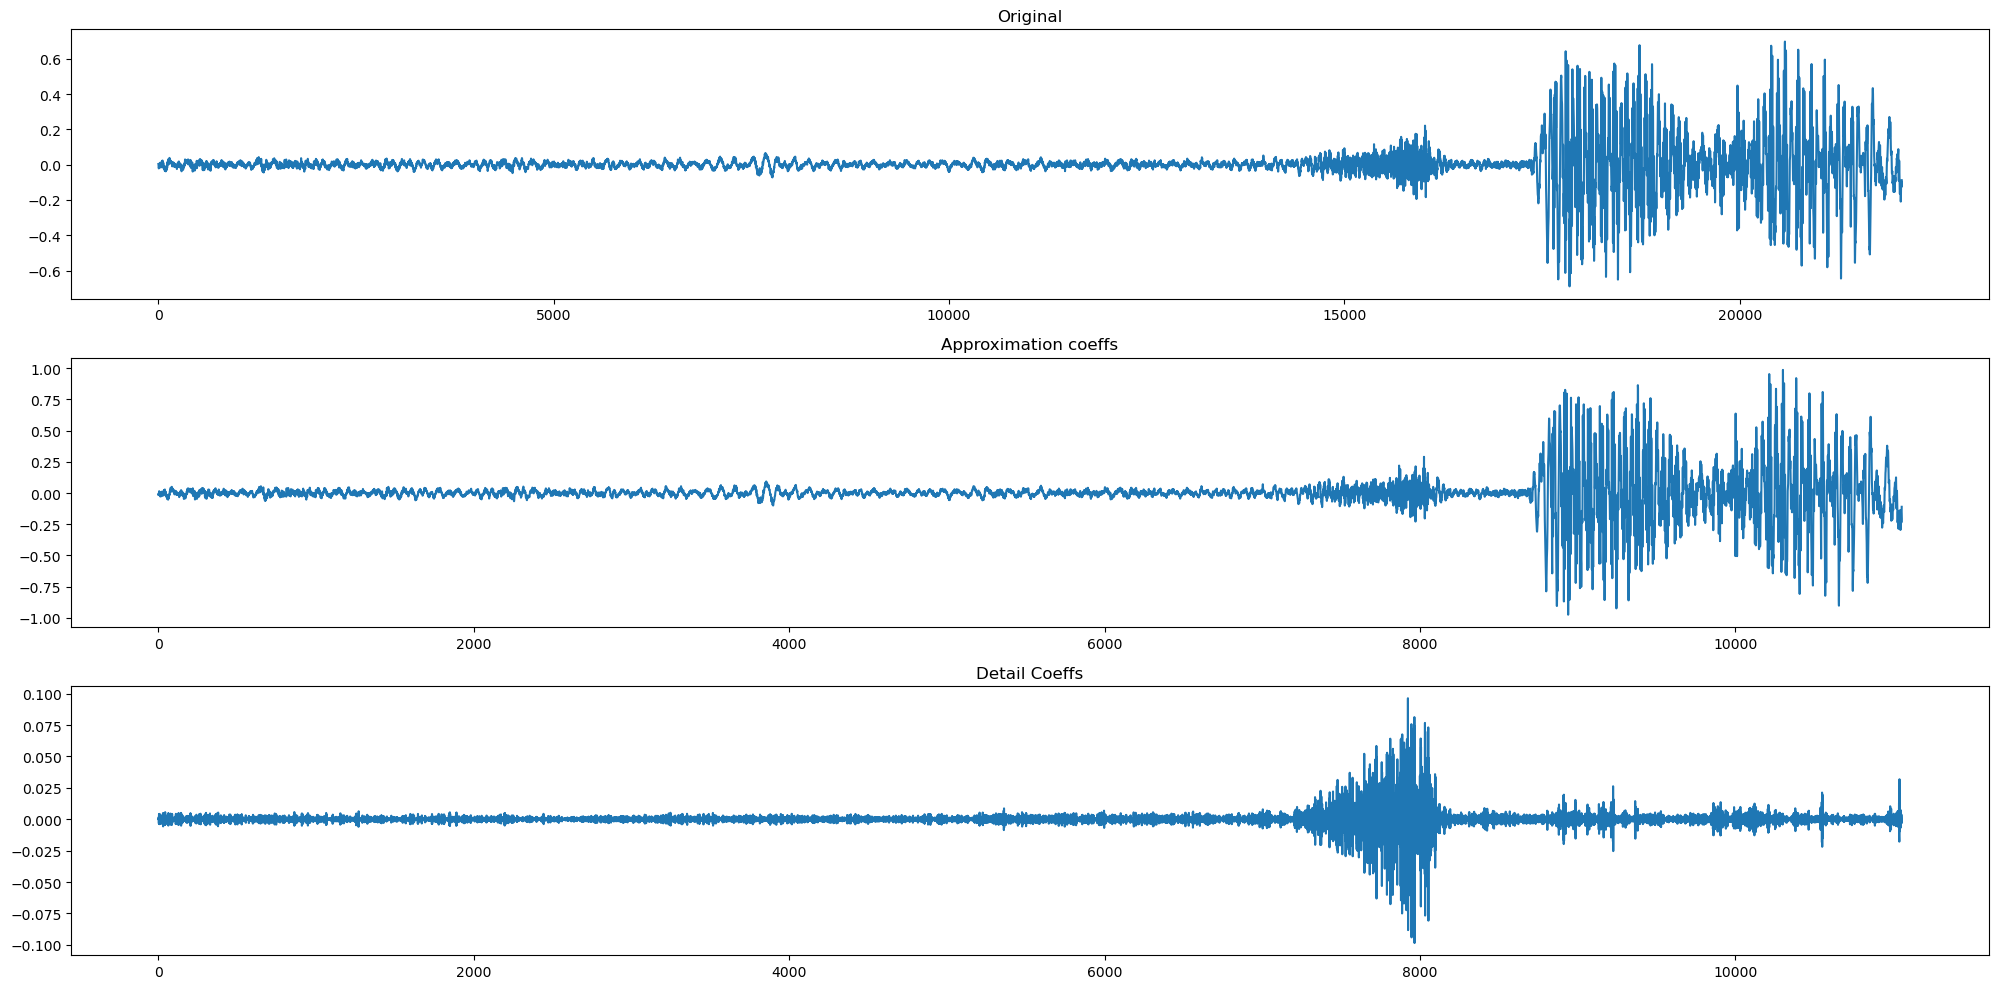

In [8]:
# Perform DWT for different wavelet types
wavelets = ['haar', 'db2', 'db3', 'db4', 'bior6.8', 'dmey']

for wavelet in wavelets:
    ca, cb = pywt.dwt(data, wavelet)

    # You can plot the coefficients to visualize them
    plt.figure(figsize=(20,10))
    plt.subplot(3, 1, 1)
    plt.plot(data[:len(t)])
    plt.title('Original')
    plt.subplot(3, 1, 2)
    plt.plot(ca)
    plt.title('Approximation coeffs')
    plt.subplot(3, 1, 3)
    plt.plot(cb)
    plt.title('Detail Coeffs')
    plt.tight_layout()
    plt.show()

1
2
3
4
5
6
7
8
9
10


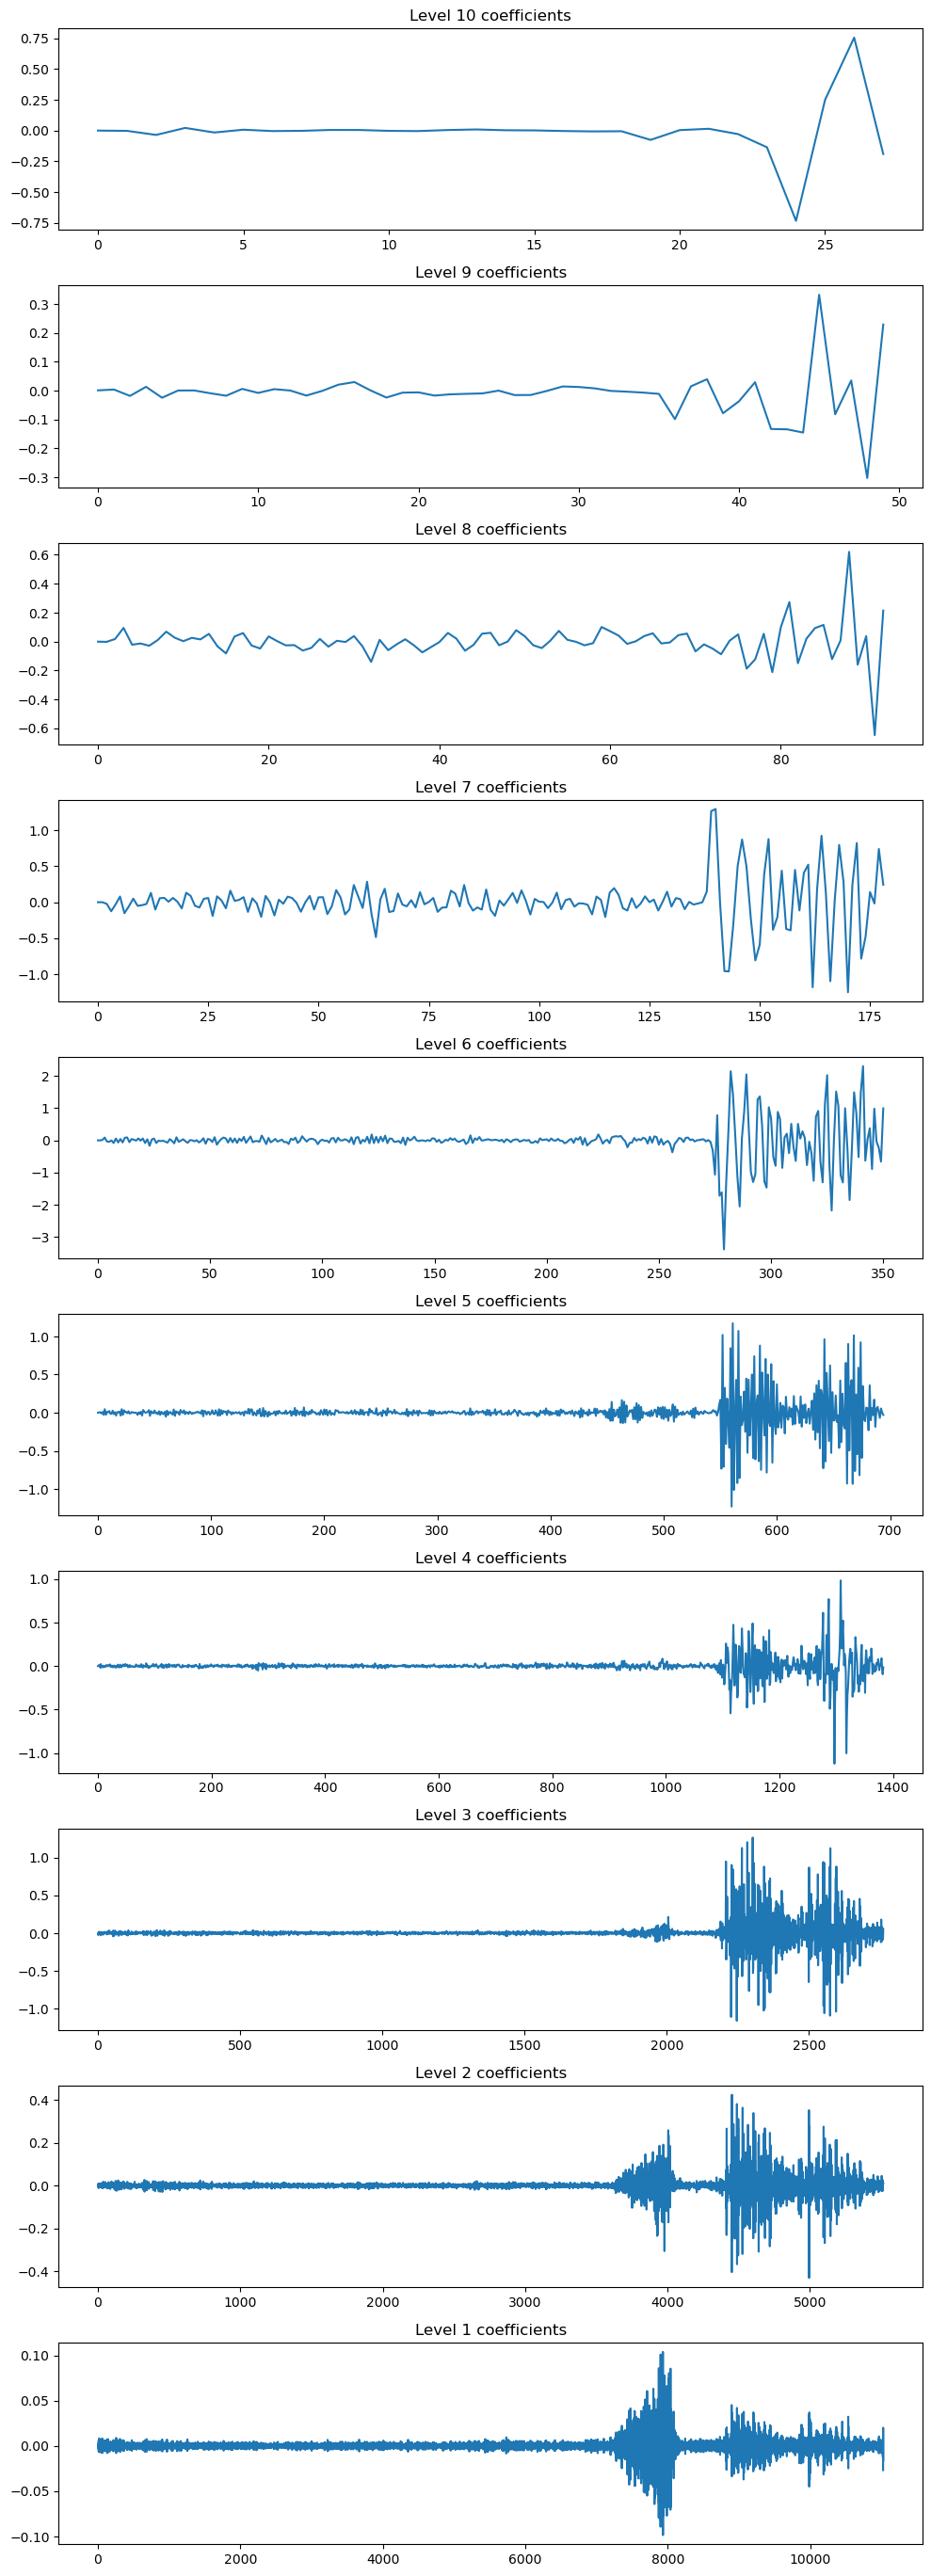

In [9]:
# Perform multi-level dwt
# wavelet
wavelet = 'db4'

# Perform DWT
level = 10
coeffs = pywt.wavedec(data, wavelet, level=level)

# 'coeffs' is a list of arrays containing the approximation and detail coefficients at each level.
# The first element of 'coeffs' contains the approximation coefficients at the highest level.
# The remaining elements contain the detail coefficients at each level, in descending order.

plt.figure(figsize=(10,30))
for i in range(1, len(coeffs)):
    print(i)
    plt.subplot(len(coeffs), 1, i+1)
    plt.plot(coeffs[i])
    plt.title(f'Level {level-i+1} coefficients')

plt.tight_layout()
plt.show()

# as the levels increase we see that the plot smoothens, at lower levels we see more amount of fluctuations. This shows that at
# as the levels increase, we further choose low frequecy components which results in non-conjusted graphs.

archive/16000_pcm_speeches\Benjamin_Netanyau


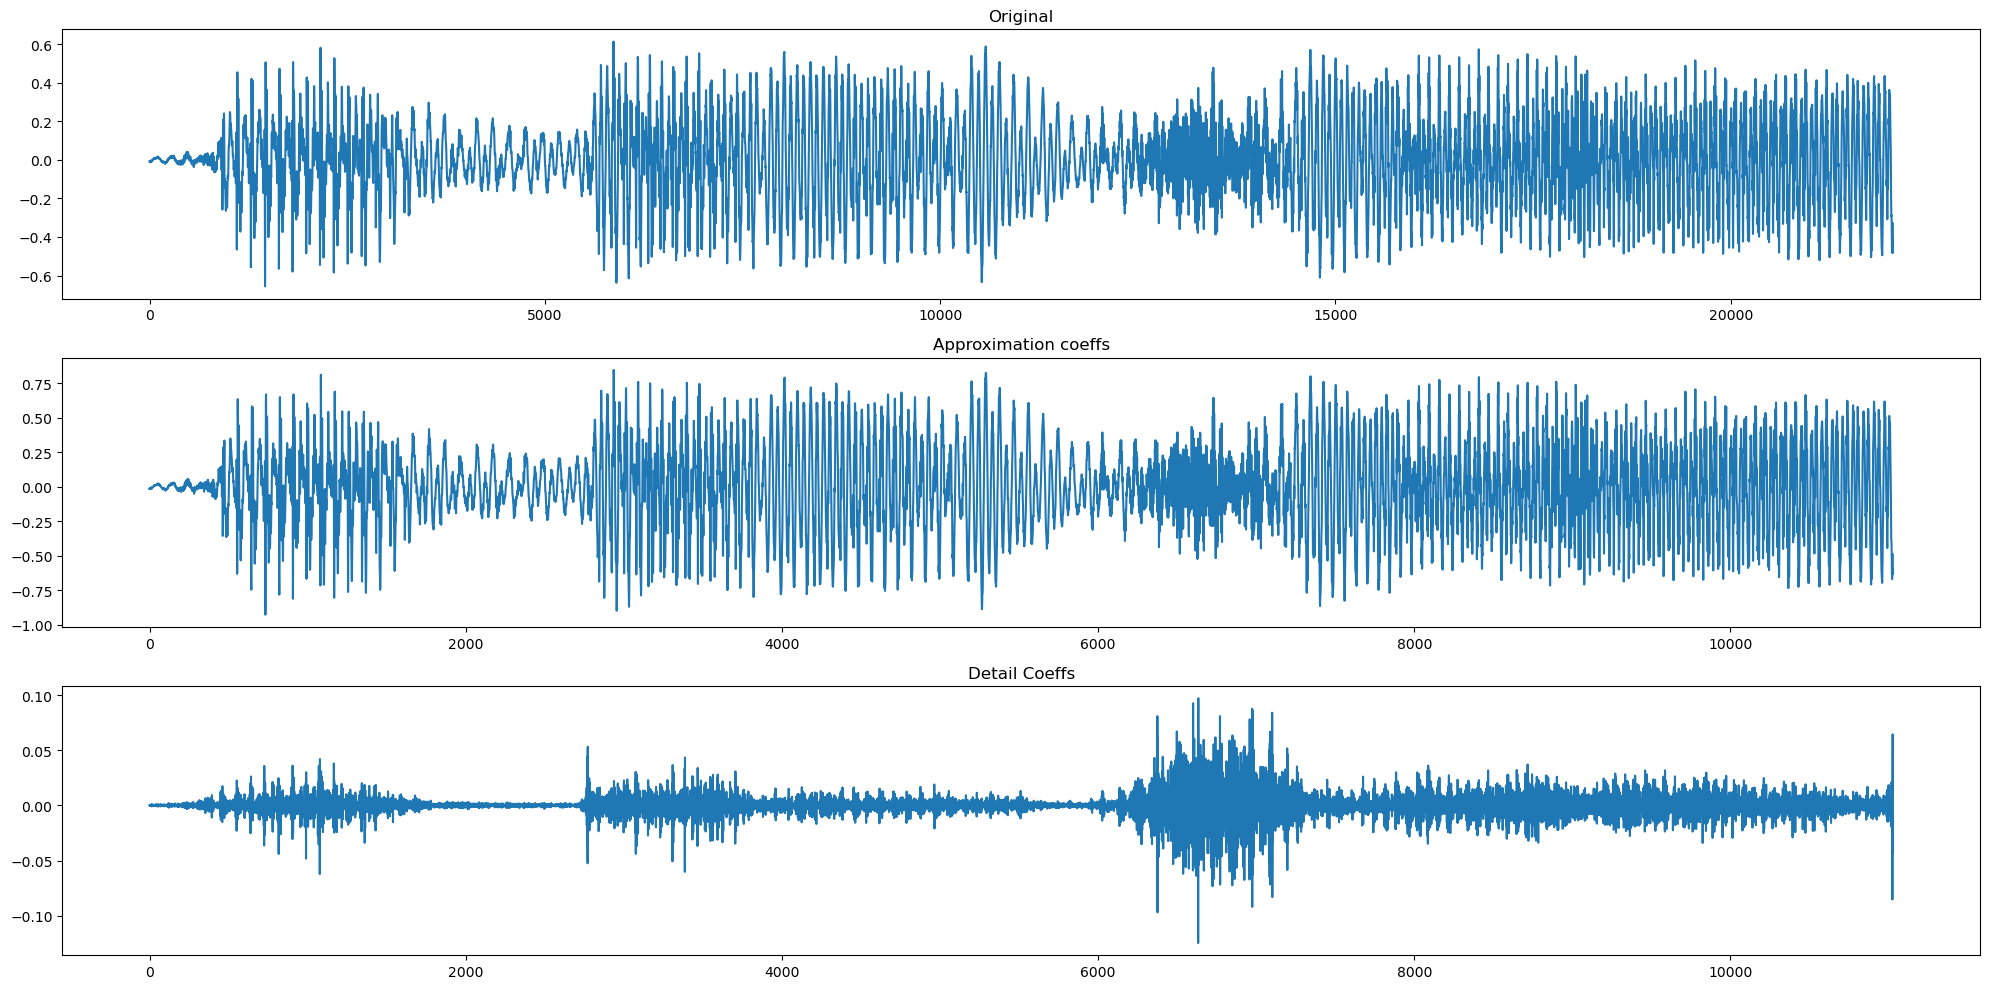

archive/16000_pcm_speeches\Jens_Stoltenberg


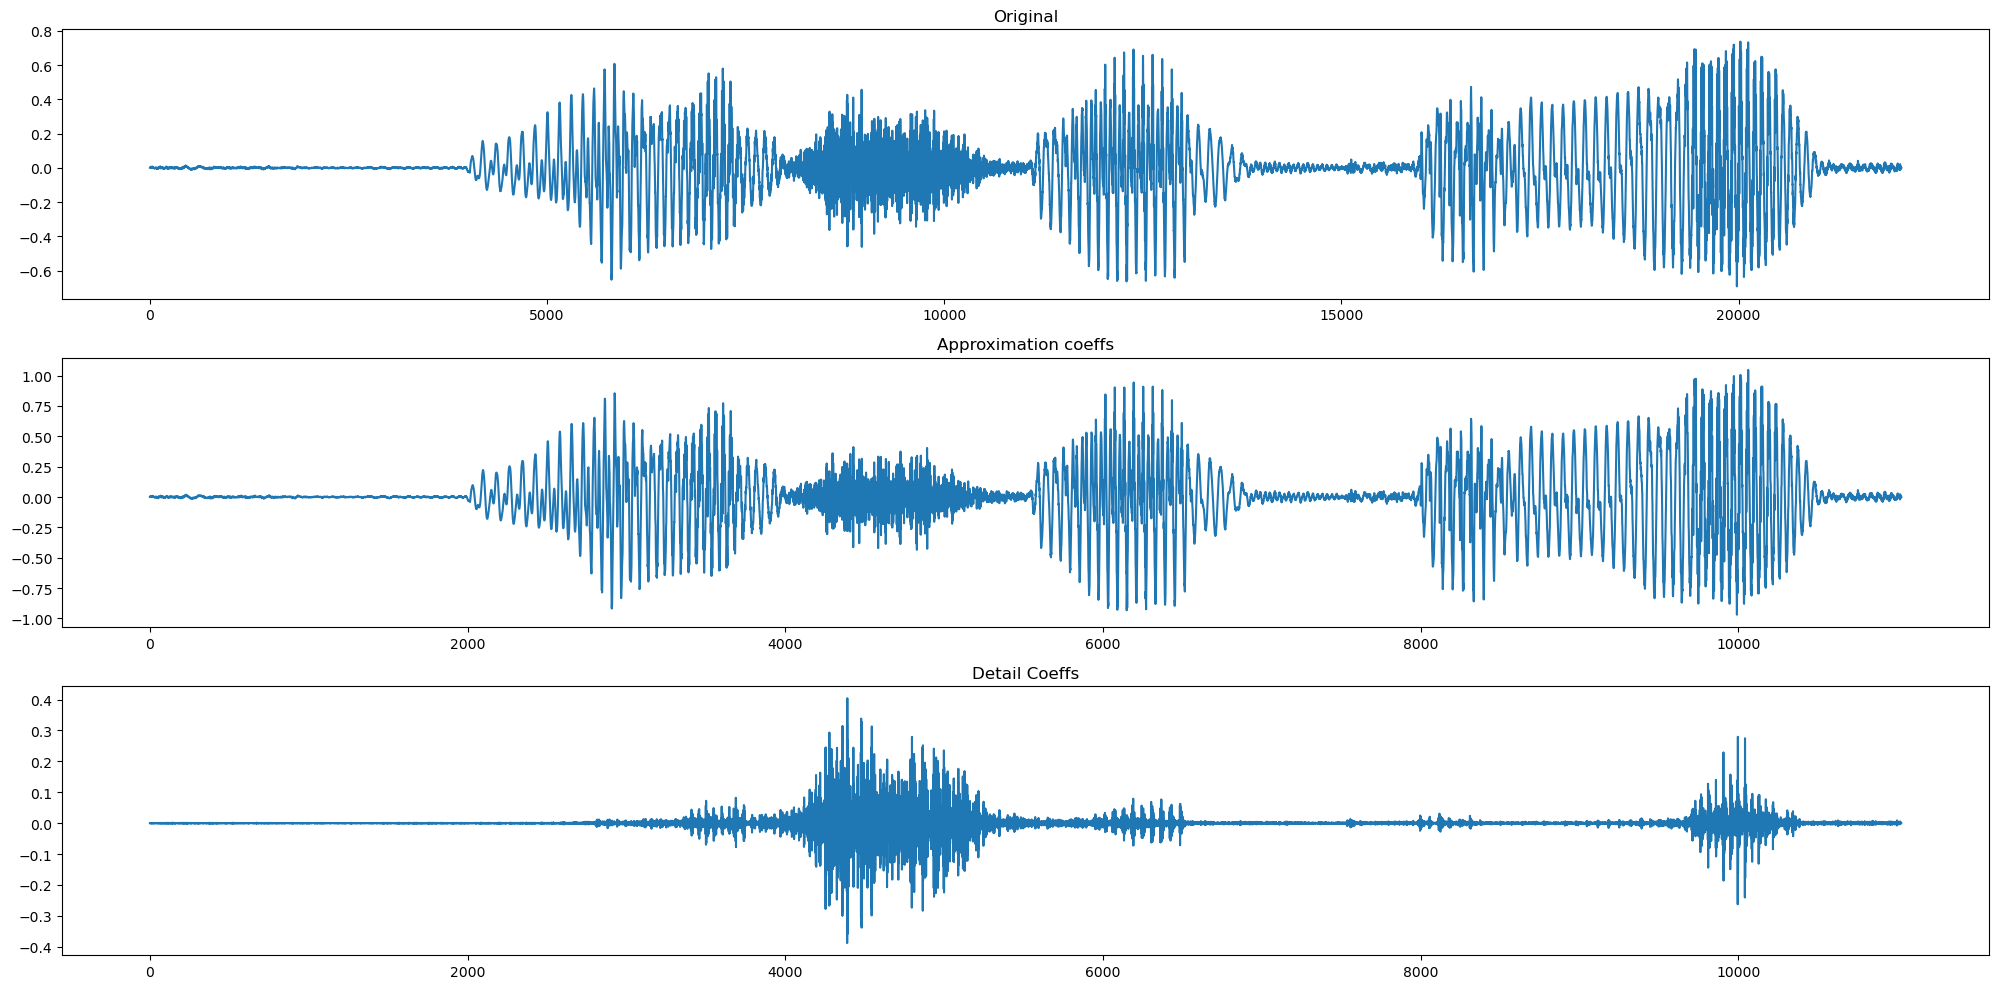

archive/16000_pcm_speeches\Julia_Gillard


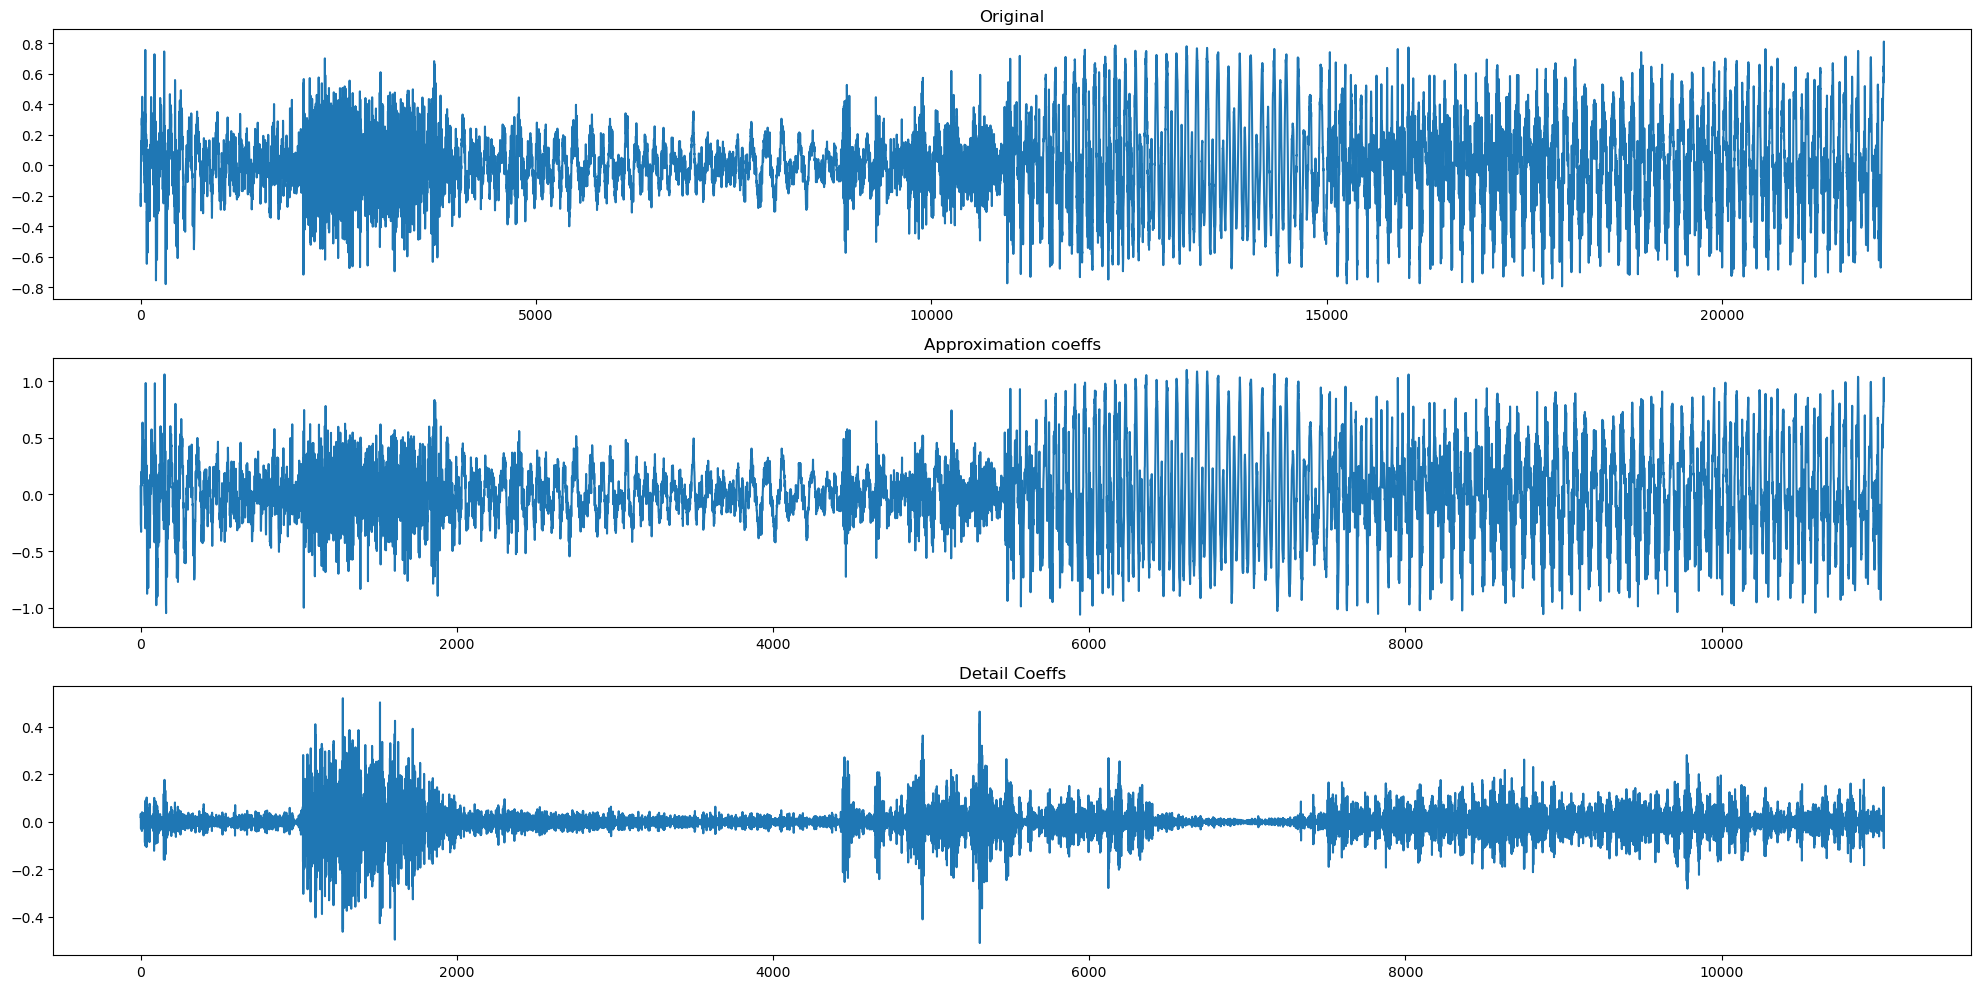

archive/16000_pcm_speeches\Magaret_Tarcher


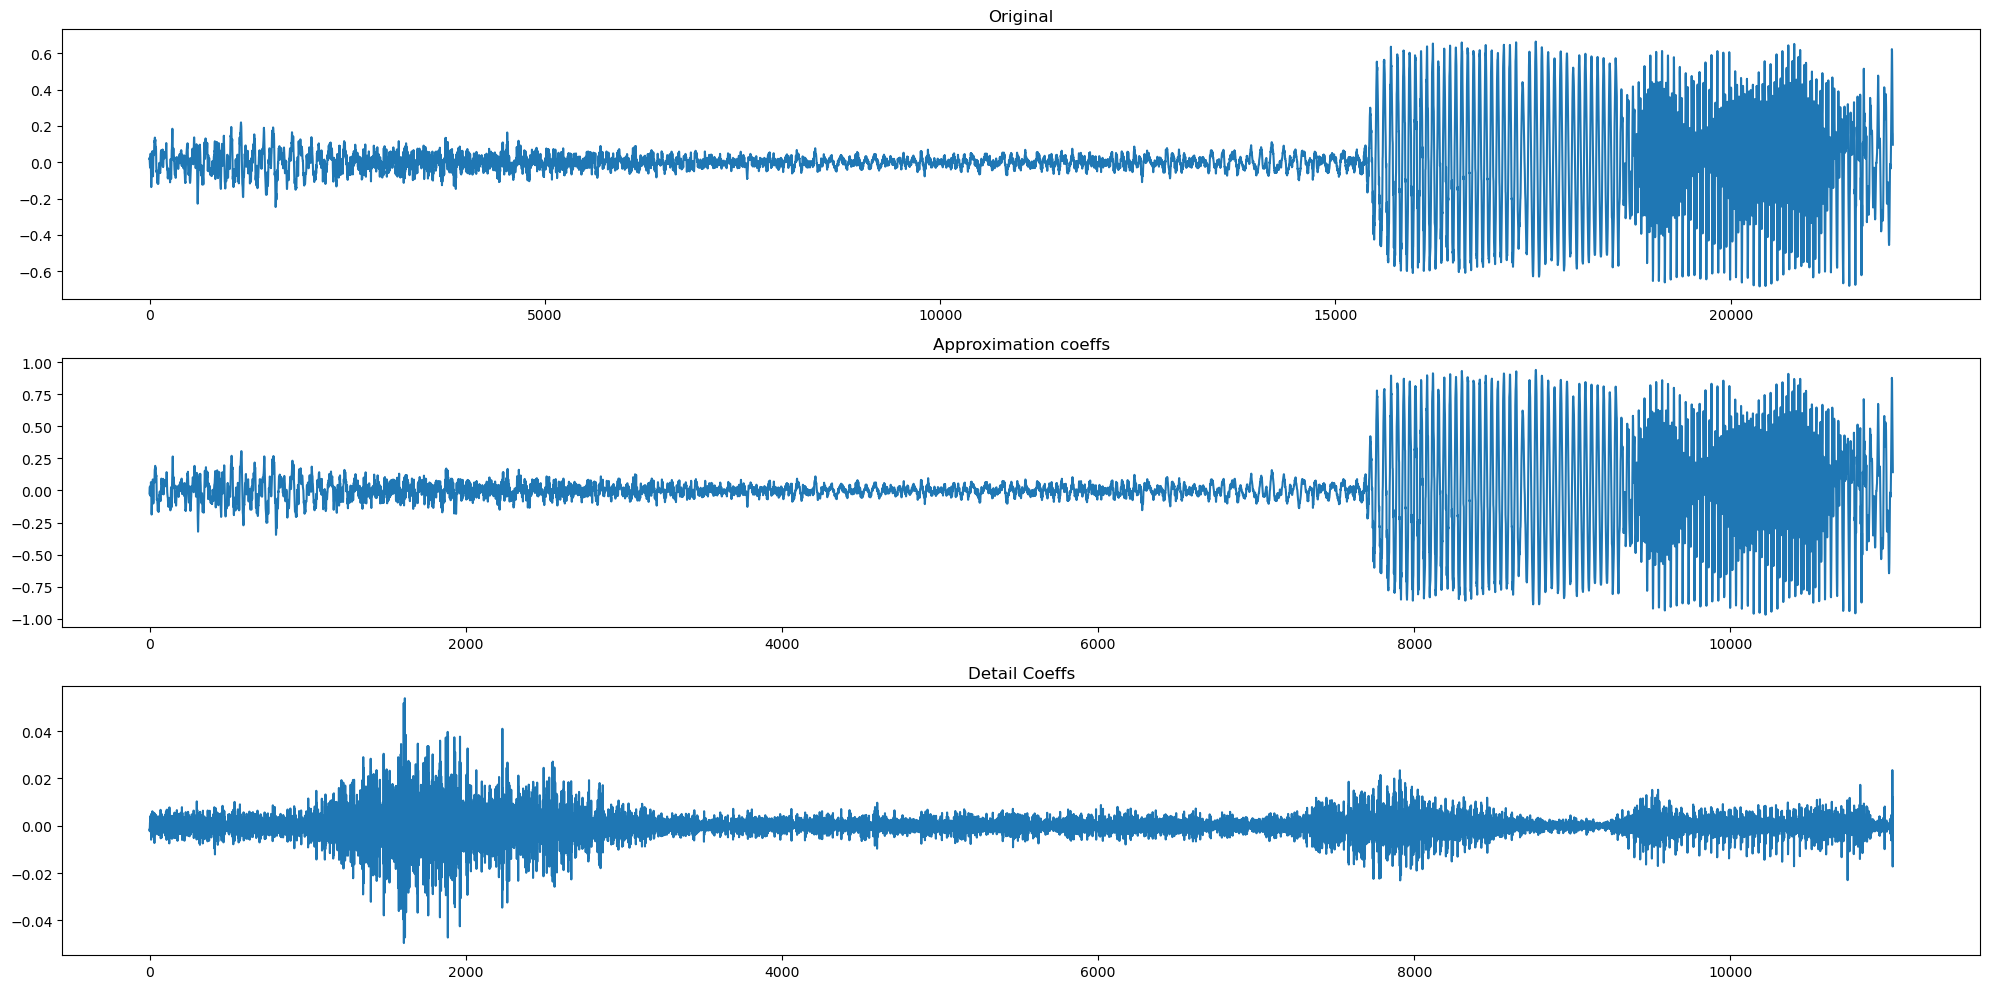

archive/16000_pcm_speeches\Nelson_Mandela


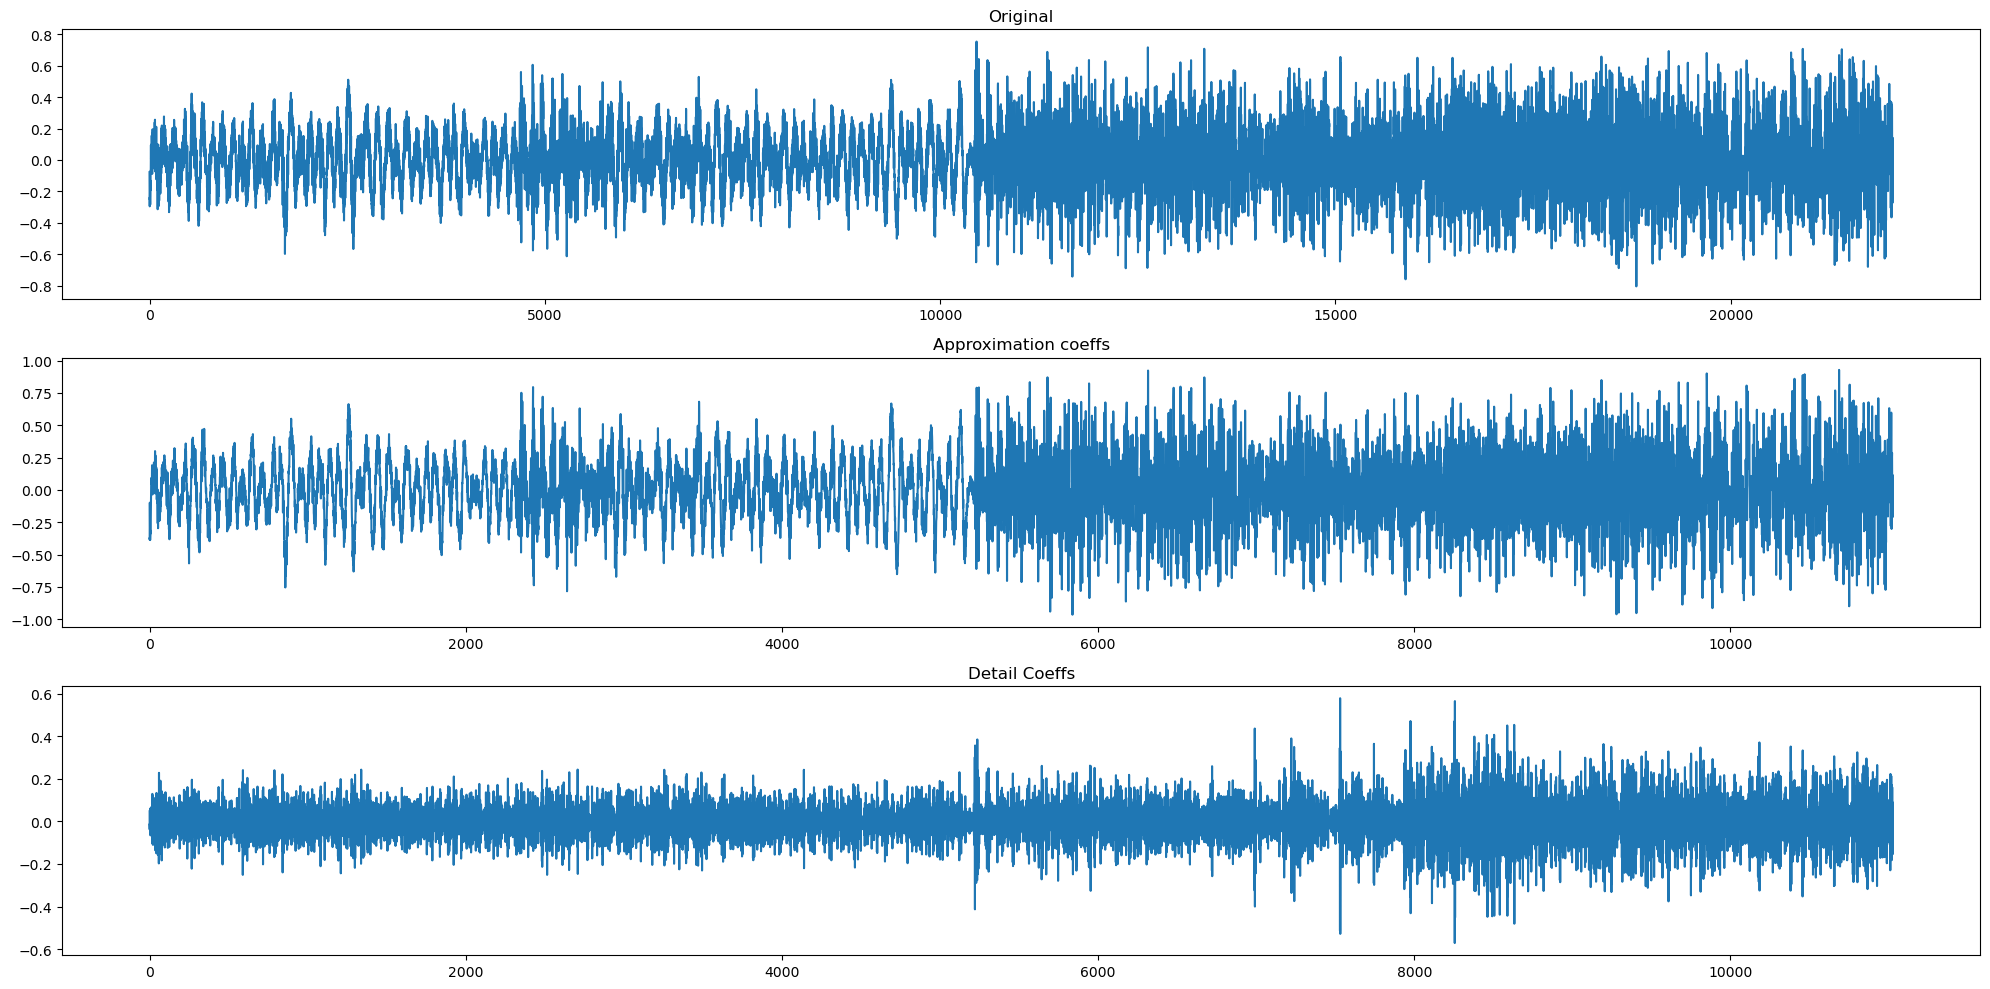

archive/16000_pcm_speeches\other


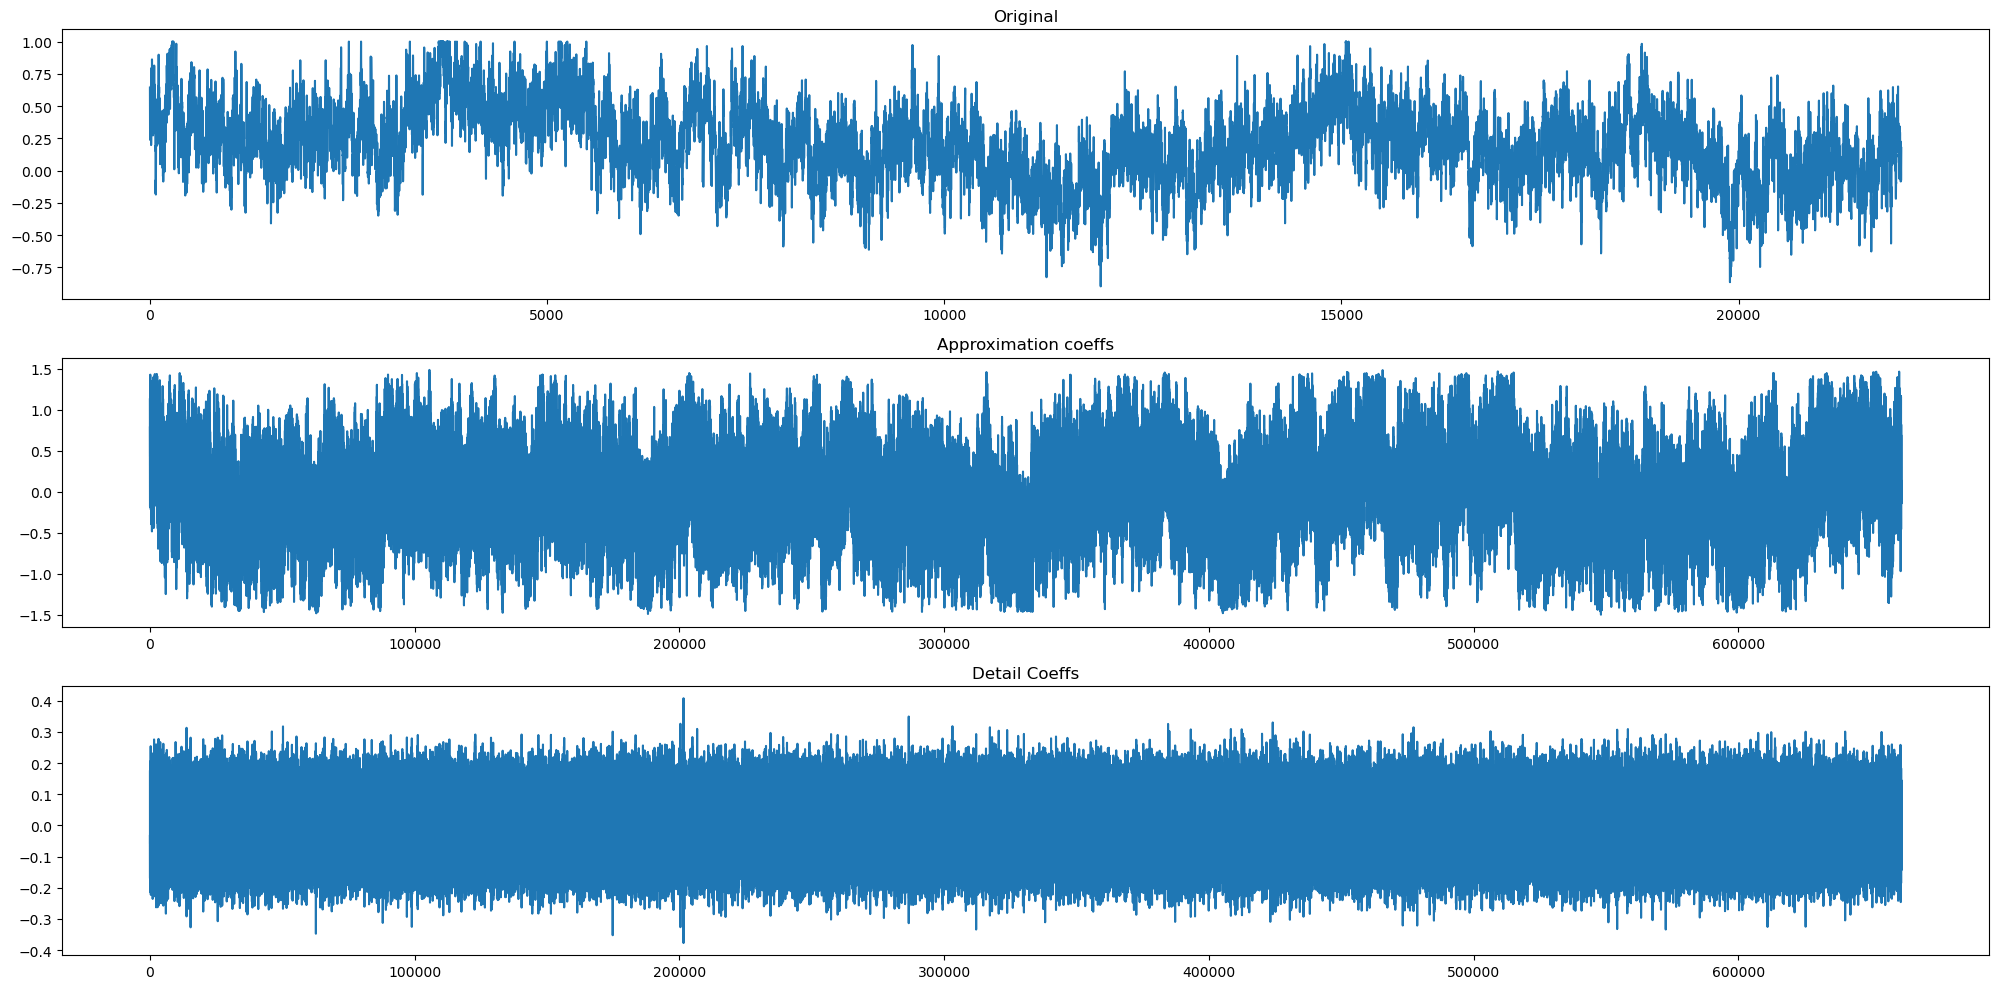

archive/16000_pcm_speeches\_background_noise_


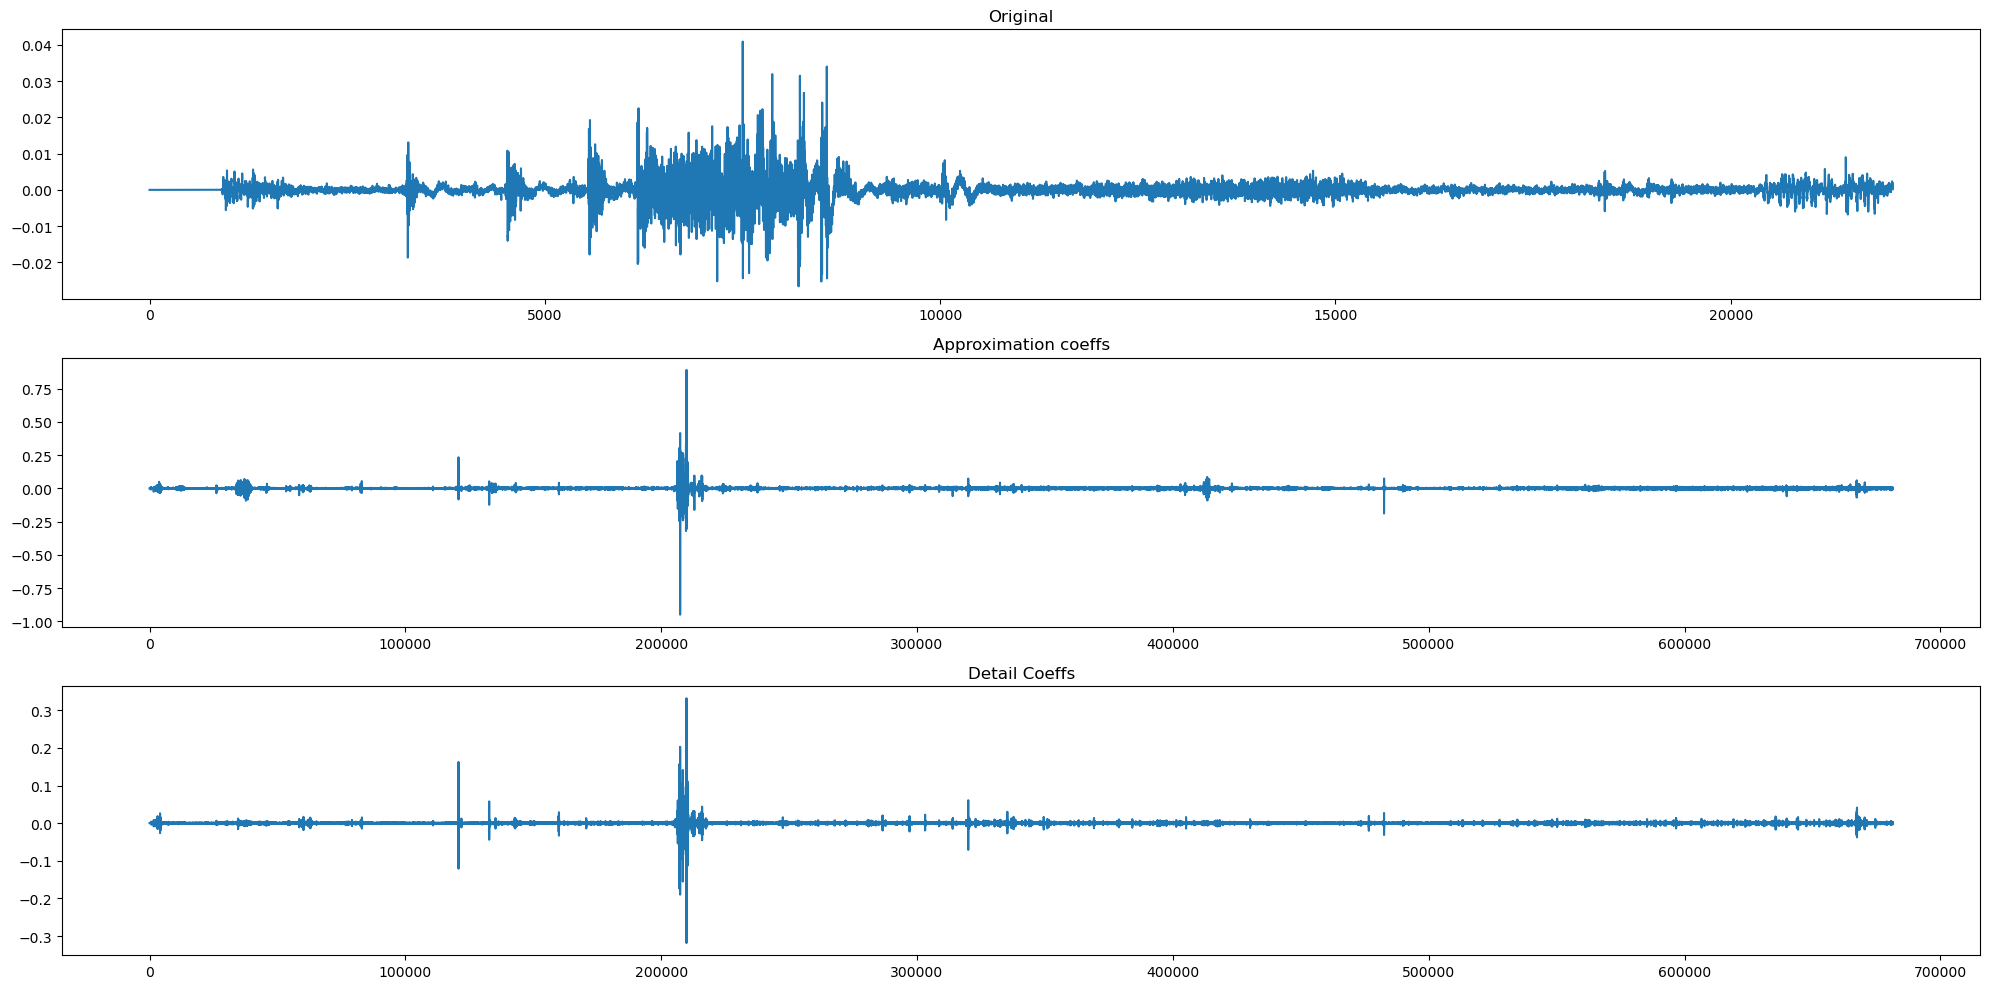

In [10]:
# DWT for randomly chosen audio signals from each class
import random

for class_name in dir_dict:
    audio_paths = dir_dict[class_name]
    print(class_name)
    random_audio_paths = random.sample(audio_paths, 1)
    for audio_path in random_audio_paths:
        data, sample_rate = librosa.load(audio_path)
        # Plotting the pitches
        # wavelet = 'db4'
        wavelet = 'db4'

        # Perform DWT
        ca, cb = pywt.dwt(data, wavelet)

        # You can plot the coefficients to visualize them
        plt.figure(figsize=(20,10))
        plt.subplot(3, 1, 1)
        plt.plot(data[:len(t)])
        plt.title('Original')
        plt.subplot(3, 1, 2)
        plt.plot(ca)
        plt.title('Approximation coeffs')
        plt.subplot(3, 1, 3)
        plt.plot(cb)
        plt.title('Detail Coeffs')
        plt.tight_layout()
        plt.show()

archive/16000_pcm_speeches\Benjamin_Netanyau


C:\Users\prava\anaconda3\lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


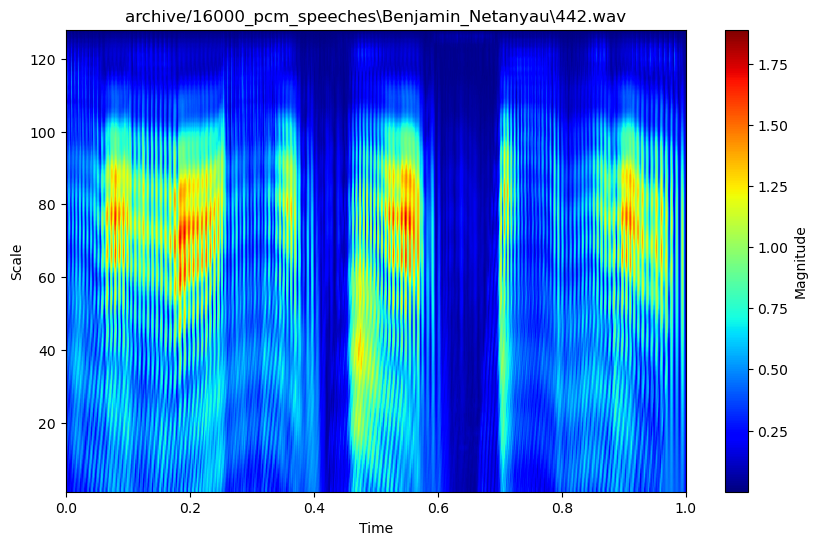

archive/16000_pcm_speeches\Jens_Stoltenberg


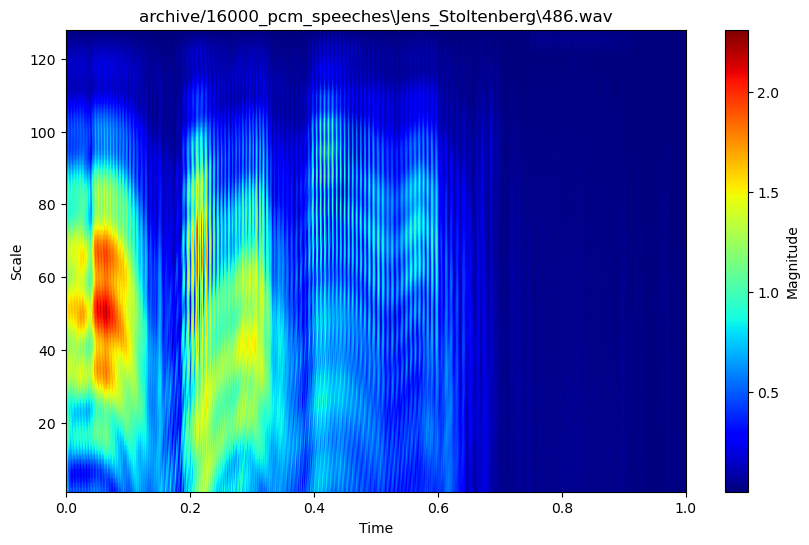

archive/16000_pcm_speeches\Julia_Gillard


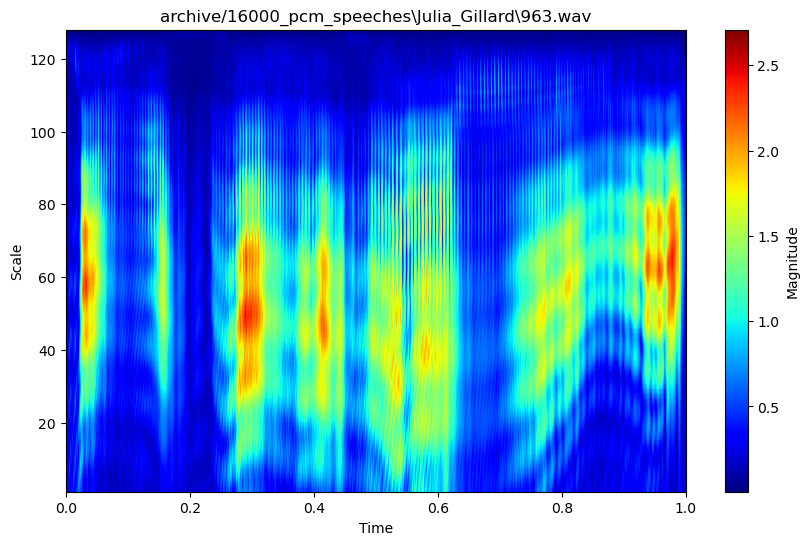

archive/16000_pcm_speeches\Magaret_Tarcher


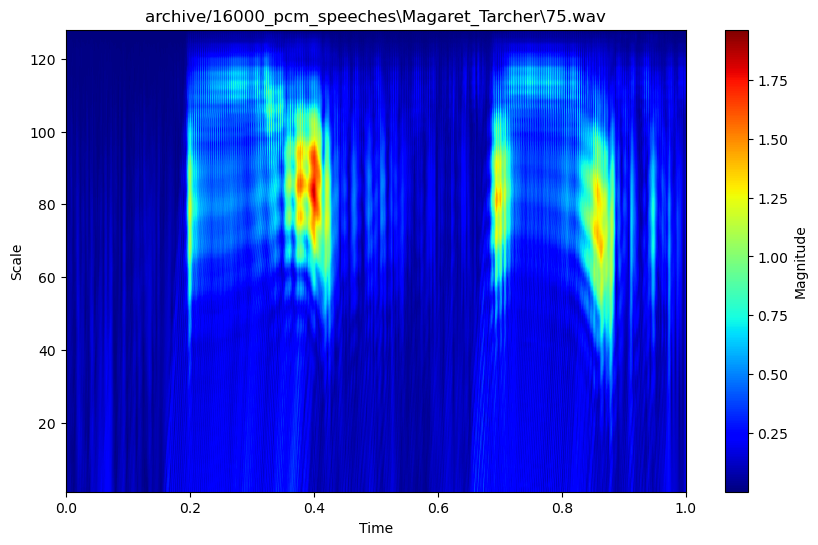

archive/16000_pcm_speeches\Nelson_Mandela


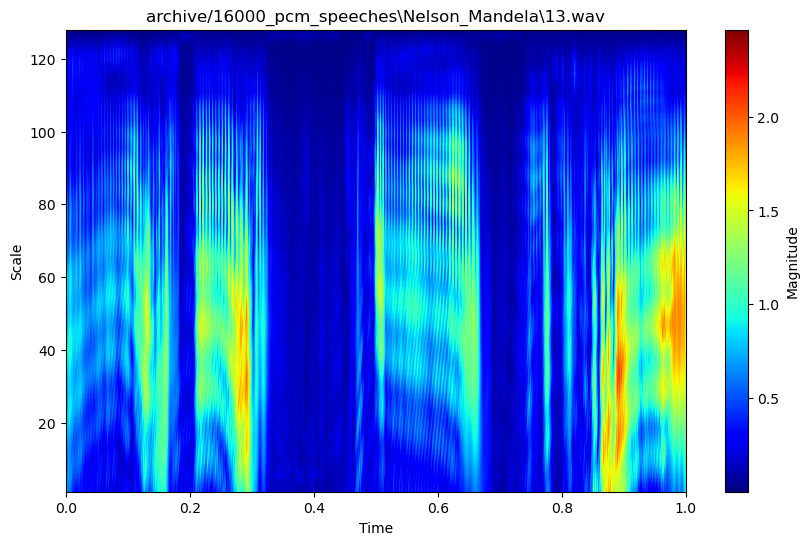

archive/16000_pcm_speeches\other


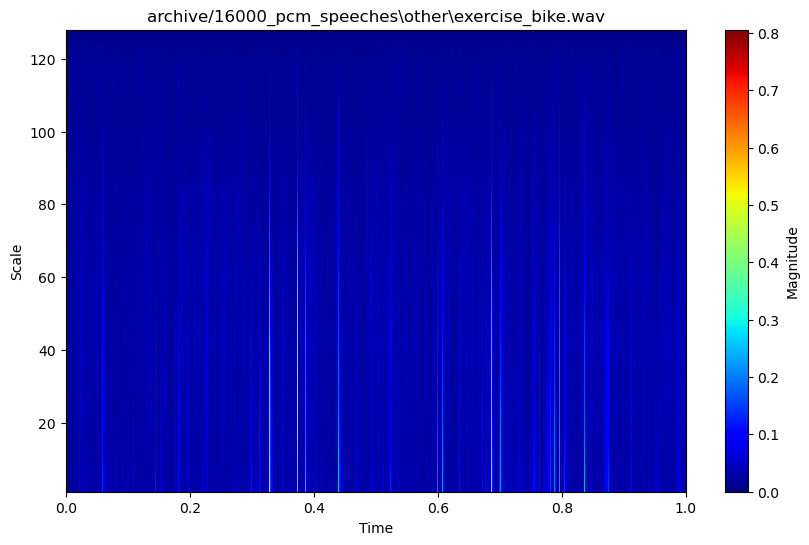

archive/16000_pcm_speeches\_background_noise_


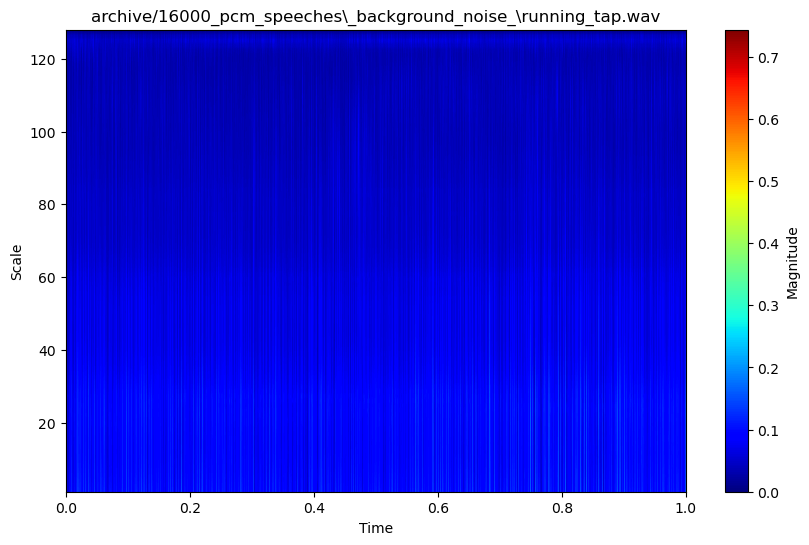

In [11]:
# CWT for randomly chosen audio signals from each class
for class_name in dir_dict:
    audio_paths = dir_dict[class_name]
    print(class_name)
    random_audio_paths = random.sample(audio_paths, 1)
    for audio_path in random_audio_paths:
        
        data, sample_rate = librosa.load(audio_path)
        
        # Apply CWT
        coefficients, frequencies = pywt.cwt(data, scales=np.arange(1, 100), wavelet='cmor')

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.imshow(np.abs(coefficients), aspect='auto', cmap='jet', extent=[0, 1, 1, 128])
        plt.colorbar(label="Magnitude")
        plt.ylabel("Scale")
        plt.xlabel("Time")
        plt.title(audio_path)
        plt.show()